In [1]:
from cbpw_liba import *

# data_01_socio_economic_102_v20240607 (Население)

In [313]:
df = pd.read_excel('data_01_socio_economic_102_v20240607.xlsx')

In [314]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Население,Y4170101000000,Численность населения,CD,Российская Федерация,страна,0,0,2000,146303.6,"оценка на конец года, тысяч человек",Данные за 2011‒2021 гг. пересчитаны с учетом и...,Регионы России. Социально-экономические показа...


In [315]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [316]:
df = df[df['indicator_name'] != "Смертность населения (без показателя смертности от внешних причин)"]

In [317]:
dfs = []

for name in df['indicator_name'].unique():
    df1 = df[df['indicator_name'] == name]
    df1 = df1[['indicator_name', 'object_name', 'object_level', 'year', 'indicator_value', 'indicator_unit']]
    assert(all([df1['year'].value_counts().values[i] == len(df1['object_name'].unique()) for i in range(len(df1['year'].value_counts().values))]))
    assert(len(df1['indicator_unit'].unique()) == 1)
    dfs.append(df1)

In [318]:
df = pd.concat(dfs, axis=0)

In [319]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [320]:
# инициализируем года
Население = {year : None for year in df['year'].unique()}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

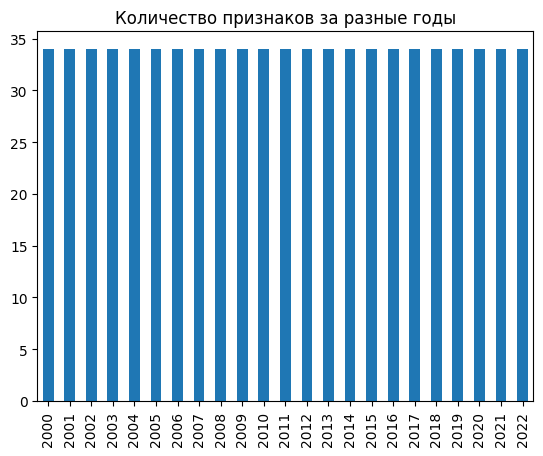

In [321]:
for key in Население.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Население[key] = new_df

total = set()
for key in Население.keys():
    total.update(set(Население[key].columns))

for key in Население.keys():
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Население[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Население[year].columns) - 3 for year in Население.keys()}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_02_socio_economic_102_v20240607 (Труд)

In [246]:
df = pd.read_excel('data_02_socio_economic_102_v20240607.xlsx')

In [247]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Труд,Y4170201000000,Численность рабочей силы,CD,Российская Федерация,страна,0,0,2000,72770.0,по данным выборочных обследований рабочей силы...,До 2017 г. обследование проводилось в отношени...,Регионы России. Социально-экономические показа...


In [248]:
needed_cols = np.array([k for k, v in df['indicator_name'].value_counts().items() if v == 2208])

In [249]:
df = df[df['indicator_name'].isin(needed_cols)]

In [250]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [251]:
dfs = []

for name in df['indicator_name'].unique():
    df1 = df[df['indicator_name'] == name]
    df1 = df1[['indicator_name', 'object_name', 'object_level', 'year', 'indicator_value', 'indicator_unit']]
    assert(all([df1['year'].value_counts().values[i] == len(df1['object_name'].unique()) for i in range(len(df1['year'].value_counts().values))]))
    assert(len(df1['indicator_unit'].unique()) == 1)
    dfs.append(df1)

In [252]:
df = pd.concat(dfs, axis=0)

In [253]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [254]:
# инициализируем года
Труд = {year : None for year in df['year'].unique()}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

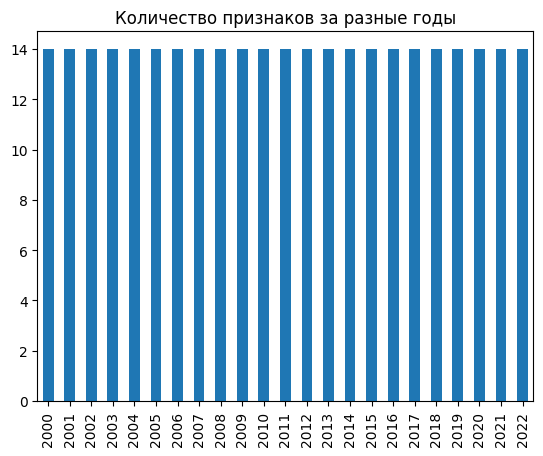

In [255]:
for key in Труд.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Труд[key] = new_df

total = set()
for key in Труд.keys():
    total.update(set(Труд[key].columns))

for key in Труд.keys():
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Труд[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Труд[year].columns) - 3 for year in Труд.keys()}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_03_socio_economic_102_v20240607 (Уровень жизни населения)

In [257]:
df = pd.read_excel('data_03_socio_economic_102_v20240607.xlsx')

In [258]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Уровень жизни населения,Y4170301010000,Реальные денежные доходы: Реальные доходы насе...,CD,Российская Федерация,страна,0,0,2000,113.4,в процентах к предыдущему году,До 2013 г. (для относительных показателей — до...,Регионы России. Социально-экономические показа...


In [259]:
try:
    # если не выполнено, то требуется ручная обработка
    assert(df['subsection'].unique() == ['CD'])
    # оно здесь не выполнено
    print('ВЫПОЛНЕНО')
except:
    print('НЕ ВЫПОЛНЕНО')

НЕ ВЫПОЛНЕНО


In [260]:
needed_cols = np.array([k for k, v in df['indicator_name'].value_counts().items() if v >= 2093])

In [261]:
df = df[df['indicator_name'].isin(needed_cols)]
df = df[df['year'].isin(np.array(range(2000, 2023, 1)))]

In [262]:
dfs = []

for name in df['indicator_name'].unique():
    df1 = df[df['indicator_name'] == name]
    if list(df1['subsection'].unique()) == ['CD']:
        df1 = df1[['indicator_name', 'object_name', 'object_level', 'year', 'indicator_value', 'indicator_unit']]
    else:
        df1 = df1[['indicator_name', 'object_name', 'object_level', 'subsection', 'year', 'indicator_value', 'indicator_unit']]
        if name == 'Реальные денежные доходы: Реальный размер назначенных пенсий':
            df1 = df1[df1['subsection'] != 'Включая единовременную выплату']
            df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -99999999, np.nan)
            df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -77777777, np.nan)
            assert(len(df1['indicator_unit'].unique()) == 1)
            dfs.append(df1)
            continue
        if name == 'Средний размер назначенных пенсий':
            df1 = df1[df1['subsection'] != 'Включая единовременную выплату']
            df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -99999999, np.nan)
            df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -77777777, np.nan)
            assert(len(df1['indicator_unit'].unique()) == 1)
            dfs.append(df1)
            continue
        if name == 'Структура денежных доходов населения':
            for i in range(4):
                df0 = df1[df1['subsection'] == df1['subsection'].unique()[i]].copy()
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -99999999, np.nan)
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -77777777, np.nan)
                df0['indicator_name'] = df0['indicator_name'] + ': ' + df0['subsection']
                assert(len(df0['indicator_unit'].unique()) == 1)
                dfs.append(df0)
            continue
        if name == 'Структура социальных выплат':
            for i in range(4):
                df0 = df1[df1['subsection'] == df1['subsection'].unique()[i]].copy()
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -99999999, np.nan)
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -77777777, np.nan)
                df0['indicator_name'] = df0['indicator_name'] + ': ' + df0['subsection']
                assert(len(df0['indicator_unit'].unique()) == 1)
                dfs.append(df0)
            continue
        if name == 'Структура использования денежных доходов населения':
            for i in range(5):
                df0 = df1[df1['subsection'] == df1['subsection'].unique()[i]].copy()
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -99999999, np.nan)
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -77777777, np.nan)
                df0['indicator_name'] = df0['indicator_name'] + ': ' + df0['subsection']
                assert(len(df0['indicator_unit'].unique()) == 1)
                dfs.append(df0)
            continue
        if name == 'Структура потребительских расходов домашних хозяйств':
            for i in range(4):
                df0 = df1[df1['subsection'] == df1['subsection'].unique()[i]].copy()
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -99999999, np.nan)
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -77777777, np.nan)
                df0['indicator_name'] = df0['indicator_name'] + ': ' + df0['subsection']
                assert(len(df0['indicator_unit'].unique()) == 1)
                dfs.append(df0)
            continue
        else:
            print(name)
            continue
    df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -99999999, np.nan)
    df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -77777777, np.nan)
    assert(len(df1['indicator_unit'].unique()) == 1)
    dfs.append(df1)

In [263]:
df = pd.concat(dfs, axis=0)

In [264]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [265]:
# инициализируем года
Уровень_жизни_населения = {year : None for year in df['year'].unique()}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

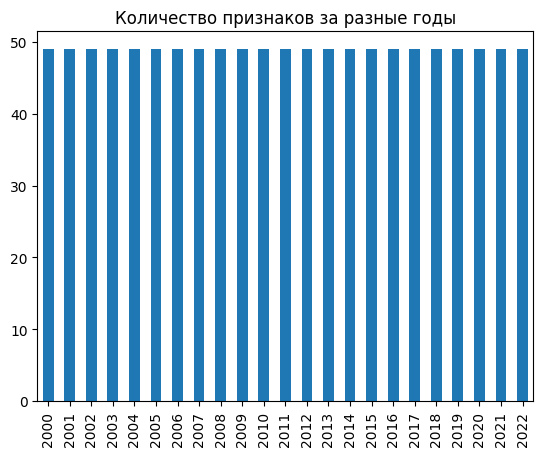

In [266]:
for key in Уровень_жизни_населения.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Уровень_жизни_населения[key] = new_df

total = set()
for key in Уровень_жизни_населения.keys():
    total.update(set(Уровень_жизни_населения[key].columns))

for key in Уровень_жизни_населения.keys():
    total = total.intersection(set(Уровень_жизни_населения[key].columns))

for key in Уровень_жизни_населения.keys():
    Уровень_жизни_населения[key] = Уровень_жизни_населения[key][list(total)]
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Уровень_жизни_населения[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Уровень_жизни_населения[year].columns) - 3 for year in Уровень_жизни_населения.keys()}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_04_socio_economic_102_v20240607 (Образование)

In [268]:
df = pd.read_excel('data_04_socio_economic_102_v20240607.xlsx')

In [269]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Образование,Y4170401000000,"Численность воспитанников организаций, осущест...",CD,Российская Федерация,страна,0,0,2000,4263.0,"на конец года, тысяч человек",Информация за 2021 год приведена с учетом инди...,Регионы России. Социально-экономические показа...


In [270]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [271]:
# оставляем только признаки реленвантные в 2000 году
needed = df[df['year'] == 2000]['indicator_name'].unique()
df = df[df['indicator_name'].isin(needed)]

In [272]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [273]:
dfs = []

for name in df['indicator_name'].unique():
    df1 = df[df['indicator_name'] == name]
    if (len(df1['year'].unique()) == 23):
        df1 = df1[['indicator_name', 'object_name', 'year', 'indicator_value', 'indicator_unit']]
        df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] >= 0, np.nan)
        assert(sorted(df1['year'].unique()) == [i for i in range(2000, 2023, 1)])
        assert(len(df1['indicator_unit'].unique()) == 1)
        dfs.append(df1)

In [274]:
# инициализируем года
Образование = {year : None for year in df['year'].unique()}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

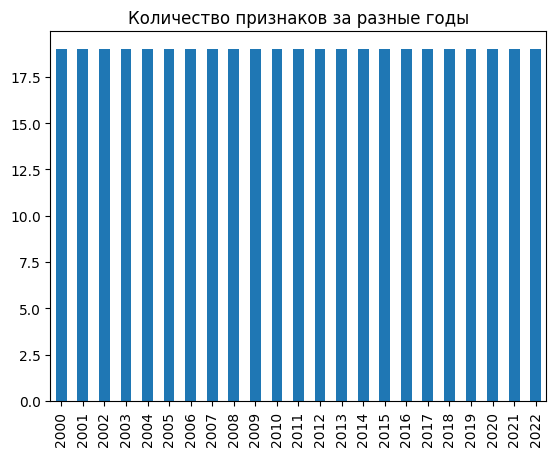

In [275]:
for key in Образование.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Образование[key] = new_df

total = set()
for key in Образование.keys():
    total.update(set(Образование[key].columns))

for key in Образование.keys():
    total = total.intersection(set(Образование[key].columns))

for key in Образование.keys():
    Образование[key] = Образование[key][list(total)]
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Образование[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Образование[year].columns) - 3 for year in Образование.keys()}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_05_socio_economic_102_v20240607 (Здравоохранение)

In [277]:
df = pd.read_excel('data_05_socio_economic_102_v20240607.xlsx')

In [278]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Здравоохранение,Y4170501010000,Число больничных коек: Всего,CD,Российская Федерация,страна,0,0,2000,1671.6,"на конец года, тысяч коек",2005 г. — включая койки дневных стационаров,Регионы России. Социально-экономические показа...


In [279]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [280]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [281]:
# инициализируем года
Здравоохранение = {year : None for year in df['year'].unique()}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

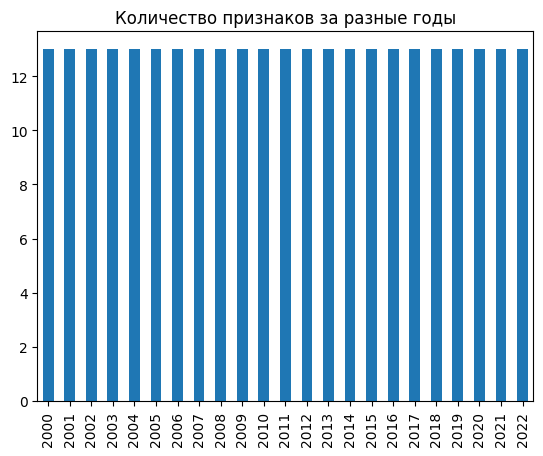

In [282]:
for key in Здравоохранение.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Здравоохранение[key] = new_df

total = set()
for key in Здравоохранение.keys():
    total.update(set(Здравоохранение[key].columns))

for key in Здравоохранение.keys():
    total = total.intersection(set(Здравоохранение[key].columns))

for key in Здравоохранение.keys():
    Здравоохранение[key]=  Здравоохранение[key][list(total)]
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Здравоохранение[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Здравоохранение[year].columns) - 3 for year in Здравоохранение.keys()}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_06_socio_economic_102_v20240607 (Культура, отдых и туризм)

In [284]:
df = pd.read_excel('data_06_socio_economic_102_v20240607.xlsx')

In [285]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,"Культура, отдых и туризм",Y4170601010000,Численность зрителей театров и число посещений...,CD,Российская Федерация,страна,0,0,2000,210.0,человек,Расчет осуществлен на основе данных Минкультур...,Регионы России. Социально-экономические показа...


In [286]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [287]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [288]:
# инициализируем года
Культура_отдых_и_туризм = {year : None for year in df['year'].unique()}

В 2000 году не учлись:
~~~ Численность российских туристов, обслуженных туристскими фирмами: Численность российских туристов, отправленных туристскими фирмами, в зарубежные туры (тысяч человек)
~~~ Детский отдых: Численность детей, отдохнувших в них за лето в 2000‒2017 гг. (тысяч человек)
~~~ Детские оздоровительные лагеря: Число детских оздоровительных лагерей в 2000‒2017 гг. (ND)
~~~ Туристские фирмы: Число турпакетов, реализованных населению (тысяч)
~~~ Туристские фирмы: Число туристских фирм (ND)
~~~ Численность отдохнувших детей в субъекте Российской Федерации (тысяч человек)
~~~ Численность российских туристов, обслуженных туристскими фирмами: Численность российских туристов, отправленных туристскими фирмами, в туры по России (тысяч человек)
В 2001 году не учлись:
~~~ Численность российских туристов, обслуженных туристскими фирмами: Численность российских туристов, отправленных туристскими фирмами, в зарубежные туры (тысяч человек)
~~~ Детский отдых: Численность детей, отдохнувши

Text(0.5, 1.0, 'Количество признаков за разные годы')

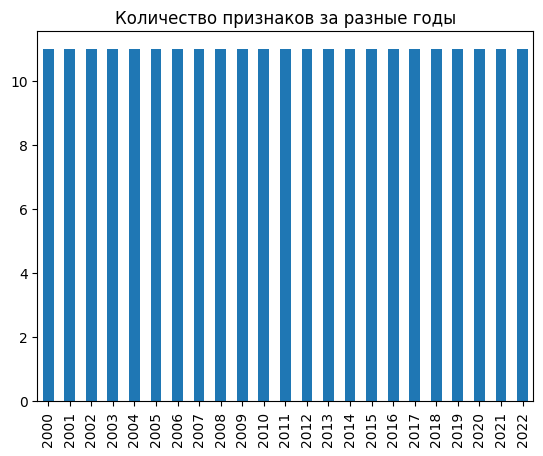

In [289]:
for key in Культура_отдых_и_туризм.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Культура_отдых_и_туризм[key] = new_df

total = set()
for key in Культура_отдых_и_туризм.keys():
    total.update(set(Культура_отдых_и_туризм[key].columns))

intersection = total
for key in Культура_отдых_и_туризм.keys():
    intersection = intersection.intersection(set(Культура_отдых_и_туризм[key].columns))


for key in Культура_отдых_и_туризм.keys():
    Культура_отдых_и_туризм[key] = Культура_отдых_и_туризм[key][list(intersection)]
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Культура_отдых_и_туризм[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Культура_отдых_и_туризм[year].columns) - 3 for year in Культура_отдых_и_туризм.keys()}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_07_socio_economic_102_v20240607 (Земельные ресурсы и охрана окружающей природной среды)

In [291]:
df = pd.read_excel('data_07_socio_economic_102_v20240607.xlsx')

In [292]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Земельные ресурсы и охрана окружающей природно...,Y4170701010000,Земельная площадь по видам угодий: Сельскохозя...,CD,Российская Федерация,страна,0,0,2005,220.7,"на конец года, тысяч га; для значений в целом ...",По данным Федеральной службы государственной р...,Регионы России. Социально-экономические показа...


In [293]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [294]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [295]:
# инициализируем года
Земля_и_охрана_природы = {year : None for year in df['year'].unique()}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

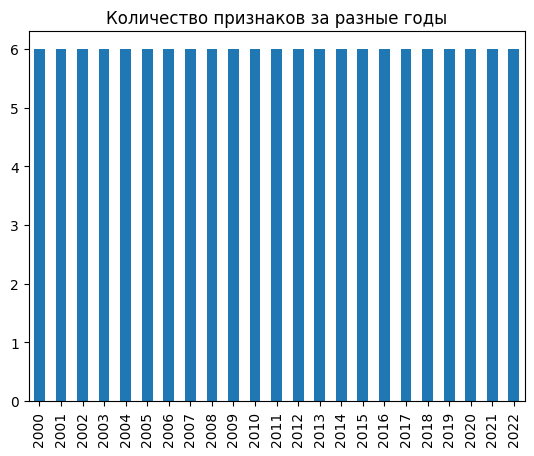

In [296]:
for key in Земля_и_охрана_природы.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Земля_и_охрана_природы[key] = new_df

total = set()
for key in Земля_и_охрана_природы.keys():
    total.update(set(Земля_и_охрана_природы[key].columns))

for key in Земля_и_охрана_природы.keys():
    total = total.intersection(set(Земля_и_охрана_природы[key].columns))

for key in range(2000, 2023):
    Земля_и_охрана_природы[key] = Земля_и_охрана_природы[key][list(total)]
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Земля_и_охрана_природы[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Земля_и_охрана_природы[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_08_socio_economic_102_v20240607 (Валовой региональный продукт) - EXCLUDED

In [298]:
df = pd.read_excel('data_08_socio_economic_102_v20240607.xlsx')

In [299]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Валовой региональный продукт,Y4170801000000,Валовой региональный продукт,CD,Российская Федерация,страна,0,0,2000,5753671.6,миллионов рублей,CD,Регионы России. Социально-экономические показа...


In [300]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [301]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [302]:
# инициализируем года
ВРП = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
~~~ Валовое накопление основного капитала в 2000‒2015 гг. (в текущих рыночных ценах, миллионов рублей)
В 2017 году не учлись:
~~~ Валовое накопление основного капитала в 2000‒2015 гг. (в текущих рыночных ценах, миллионов рублей)
В 2018 году не учлись:
~~~ Валовое накопление основного капитала в 2000‒2015 гг. (в текущих рыночных ценах, миллионов рублей)
В 2019 году не учлись:
~~~ Валовое накопление основного капитала в 2000‒2015 гг. (в текущих рыночных ценах, миллионов рублей)
В 2020 году не учлись:
~~~ Валовое накопление основного капитала в 2000‒2015 гг. (в текущих рыночных ценах, миллионов рублей)
В 

Text(0.5, 1.0, 'Количество признаков за разные годы')

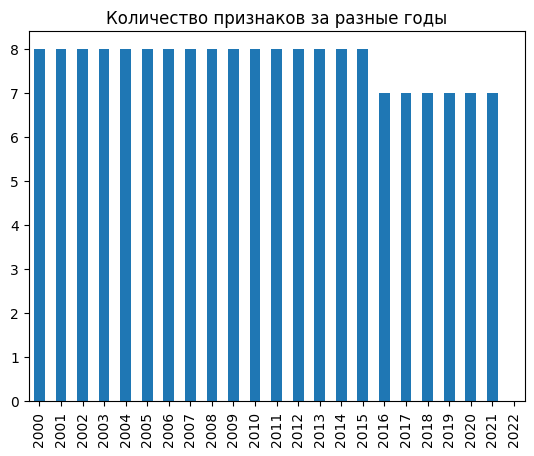

In [303]:
for key in ВРП.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    ВРП[key] = new_df

total = set()
for key in ВРП.keys():
    total.update(set(ВРП[key].columns))

for key in range(2000, 2023):
    if key == 2022:
        continue
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(ВРП[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(ВРП[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_09_socio_economic_102_v20240607 (Основные фонды)

In [306]:
df = pd.read_excel('data_09_socio_economic_102_v20240607.xlsx')

In [307]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Основные фонды,Y4170901000000,Стоимость основных фондов,CD,Российская Федерация,страна,0,0,2000,17464172.0,"на конец года, по полной учетной стоимости, ми...",С учетом проводившихся переоценок,Регионы России. Социально-экономические показа...


In [308]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [309]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [310]:
# инициализируем года
Основные_фонды = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

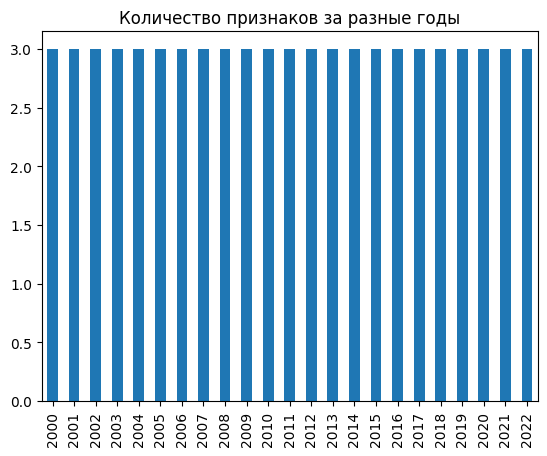

In [311]:
for key in Основные_фонды.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Основные_фонды[key] = new_df

total = set()
for key in Основные_фонды.keys():
    total.update(set(Основные_фонды[key].columns))

for key in Основные_фонды.keys():
    total = total.intersection(set(Основные_фонды[key].columns))

for key in range(2000, 2023):
    Основные_фонды[key] = Основные_фонды[key][list(total)]
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Основные_фонды[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Основные_фонды[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_10_socio_economic_102_v20240607 (Инвестиции)

In [313]:
df = pd.read_excel('data_10_socio_economic_102_v20240607.xlsx')

In [314]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Инвестиции,Y4171001000000,Инвестиции в основной капитал,CD,Российская Федерация,страна,0,0,2000,1165234.0,"в фактически действовавших ценах, миллионов ру...",2022 г. — включая уточнение на федеральном уро...,Регионы России. Социально-экономические показа...


In [315]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [316]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [317]:
# инициализируем года
Инвестиции = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

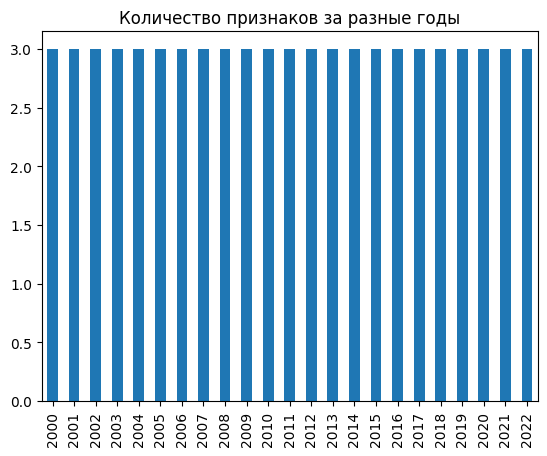

In [318]:
for key in Инвестиции.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Инвестиции[key] = new_df

########################
# сразу выбираем только те признаки, которые есть для всех годов
total = set()
for key in Инвестиции.keys():
    total.update(set(Инвестиции[key].columns))

for key in range(2000, 2023):
    total = total.intersection(set(Инвестиции[key].columns))
total = np.array(list(total))

for key in range(2000, 2023):
    buff_df = pd.DataFrame()
    buff_df['object_name'] = Инвестиции[key]['object_name']
    buff_df['object_level'] = Инвестиции[key]['object_level']
    buff_df['year'] = Инвестиции[key]['year']

    for feature in sorted(total):
        buff_df[feature] = Инвестиции[key][feature]
    
    Инвестиции[key] = buff_df
#########################

total = set()
for key in Инвестиции.keys():
    total.update(set(Инвестиции[key].columns))

for key in range(2000, 2023):
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Инвестиции[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Инвестиции[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_11_socio_economic_102_v20240607 (Предприятия и организации)

In [320]:
df = pd.read_excel('data_11_socio_economic_102_v20240607.xlsx')

In [321]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Предприятия и организации,Y4171101000000,Число организаций,CD,Российская Федерация,страна,0,0,2000,3346483.0,на конец года,По данным государственной регистрации,Регионы России. Социально-экономические показа...


In [322]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [323]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [324]:
# инициализируем года
Предприятия_и_организации = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

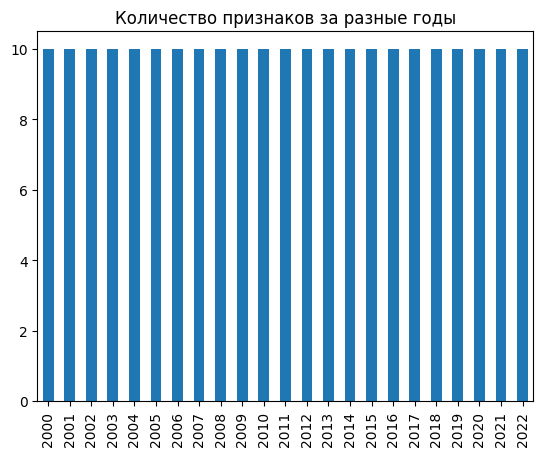

In [325]:
for key in Предприятия_и_организации.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Предприятия_и_организации[key] = new_df


#########################
# сразу выбираем только те признаки, которые есть для всех годов
total = set()
for key in Предприятия_и_организации.keys():
    total.update(set(Предприятия_и_организации[key].columns))

for key in range(2000, 2023):
    total = total.intersection(set(Предприятия_и_организации[key].columns))
total = np.array(list(total))

for key in range(2000, 2023):
    buff_df = pd.DataFrame()
    buff_df['object_name'] = Предприятия_и_организации[key]['object_name']
    buff_df['object_level'] = Предприятия_и_организации[key]['object_level']
    buff_df['year'] = Предприятия_и_организации[key]['year']

    for feature in sorted(total):
        buff_df[feature] = Предприятия_и_организации[key][feature]
    
    Предприятия_и_организации[key] = buff_df
#########################


total = set()
for key in Предприятия_и_организации.keys():
    total.update(set(Предприятия_и_организации[key].columns))

for key in range(2000, 2023):
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Предприятия_и_организации[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Предприятия_и_организации[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_12_socio_economic_102_v20240607 (Промышленное производство) - EXCLUDED

# data_13_socio_economic_102_v20240607 (Сельское, лесное хозяйство, рыболовство и рыбоводство)

In [333]:
df = pd.read_excel('data_13_socio_economic_102_v20240607.xlsx')

In [338]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,"Сельское, лесное хозяйство, рыболовство и рыбо...",Y4171301000000,Продукция сельского хозяйства,CD,Российская Федерация,страна,0,0,2000,742424.398,"в хозяйствах всех категорий, в фактически дейс...",Изменения внесены в связи с получением итогов ...,Регионы России. Социально-экономические показа...


In [339]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [340]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [341]:
Сельхоз_и_рыболовство = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

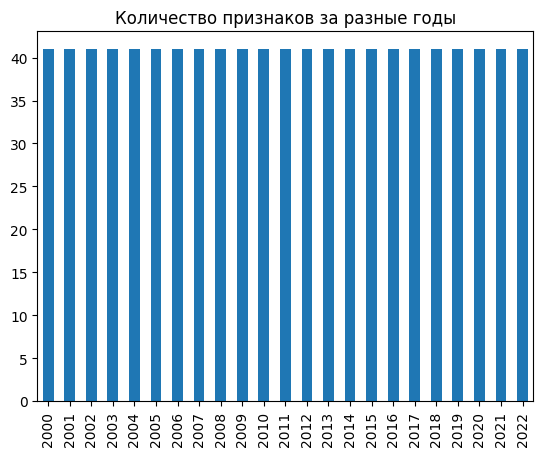

In [342]:
for key in Сельхоз_и_рыболовство.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Сельхоз_и_рыболовство[key] = new_df


#########################
# сразу выбираем только те признаки, которые есть для всех годов
total = set()
for key in Сельхоз_и_рыболовство.keys():
    total.update(set(Сельхоз_и_рыболовство[key].columns))

for key in range(2000, 2023):
    total = total.intersection(set(Сельхоз_и_рыболовство[key].columns))
total = np.array(list(total))

for key in range(2000, 2023):
    buff_df = pd.DataFrame()
    buff_df['object_name'] = Сельхоз_и_рыболовство[key]['object_name']
    buff_df['object_level'] = Сельхоз_и_рыболовство[key]['object_level']
    buff_df['year'] = Сельхоз_и_рыболовство[key]['year']

    for feature in sorted(total):
        buff_df[feature] = Сельхоз_и_рыболовство[key][feature]
    
    Сельхоз_и_рыболовство[key] = buff_df
#########################


total = set()
for key in Сельхоз_и_рыболовство.keys():
    total.update(set(Сельхоз_и_рыболовство[key].columns))

for key in range(2000, 2023):
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Сельхоз_и_рыболовство[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Сельхоз_и_рыболовство[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_14_socio_economic_102_v20240607 (Строительство)

In [10]:
df = pd.read_excel('data_14_socio_economic_102_v20240607.xlsx')

In [11]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Строительство,Y4171401000000,"Объем работ, выполненных по виду экономической...",CD,Российская Федерация,страна,0,0,2000,503836.8,"в фактически действовавших ценах, миллионов ру...",2022 г. — сводные итоги по Российской Федераци...,Регионы России. Социально-экономические показа...


In [12]:
# если не выполнено, то требуется ручная обработка
try:
    assert(df['subsection'].unique() == ['CD'])
    print("ВЫПОЛНЕНО")
except:
    print("НЕ ВЫПОЛНЕНО!!!")

НЕ ВЫПОЛНЕНО!!!


In [13]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [14]:
df = df[df['indicator_name'] != 'Число зданий и сооружений, находящихся в незавершенном строительстве']

In [15]:
dfs = []

for name in df['indicator_name'].unique():
    df1 = df[df['indicator_name'] == name]
    if list(df1['subsection'].unique()) == ['CD']:
        df1 = df1[['indicator_name', 'object_name', 'object_level', 'year', 'indicator_value', 'indicator_unit']]
    else:
        df1 = df1[['indicator_name', 'object_name', 'object_level', 'subsection', 'year', 'indicator_value', 'indicator_unit']]
        if name == 'Жилые дома, находящиеся в незавершенном строительстве':
            for i in range(2):
                df0 = df1[df1['subsection'] == df1['subsection'].unique()[i]].copy()
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -99999999, np.nan)
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -77777777, np.nan)
                df0['indicator_name'] = df0['indicator_name'] + ': ' + df0['subsection']
                assert(len(df0['indicator_unit'].unique()) == 1)
                dfs.append(df0)
            continue
        else:
            print(name)
            continue
    df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -99999999, np.nan)
    df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -77777777, np.nan)
    assert(len(df1['indicator_unit'].unique()) == 1)
    dfs.append(df1)

In [16]:
df = pd.concat(dfs, axis=0)

In [17]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [18]:
# инициализируем года
Строительство = {year : None for year in df['year'].unique()}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

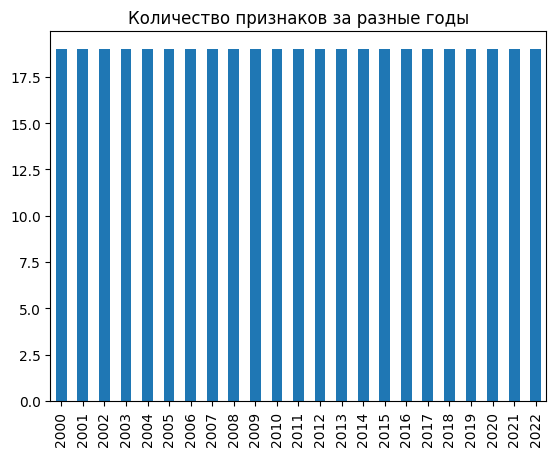

In [19]:
for key in Строительство.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Строительство[key] = new_df

total = set()
for key in Строительство.keys():
    total.update(set(Строительство[key].columns))

for key in Строительство.keys():
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Строительство[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Строительство[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_15_socio_economic_102_v20240607 (Торговля и услуги населению)

In [480]:
df = pd.read_excel('data_15_socio_economic_102_v20240607.xlsx')

In [481]:
df.head(1)

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Торговля и услуги населению,Y4171501000000,Оборот розничной торговли,CD,Российская Федерация,страна,0,0,2000,2352.3,"в фактически действовавших ценах, миллионов ру...",CD,Регионы России. Социально-экономические показа...


In [482]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [483]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [484]:
Торговля_и_услуги_населению = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

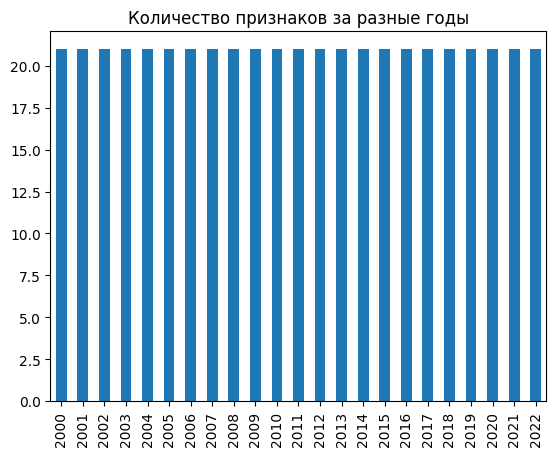

In [485]:
for key in Торговля_и_услуги_населению.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Торговля_и_услуги_населению[key] = new_df


#########################
# сразу выбираем только те признаки, которые есть для всех годов
total = set()
for key in Торговля_и_услуги_населению.keys():
    total.update(set(Торговля_и_услуги_населению[key].columns))

for key in range(2000, 2023):
    total = total.intersection(set(Торговля_и_услуги_населению[key].columns))
total = np.array(list(total))

for key in range(2000, 2023):
    buff_df = pd.DataFrame()
    buff_df['object_name'] = Торговля_и_услуги_населению[key]['object_name']
    buff_df['object_level'] = Торговля_и_услуги_населению[key]['object_level']
    buff_df['year'] = Торговля_и_услуги_населению[key]['year']

    for feature in sorted(total):
        buff_df[feature] = Торговля_и_услуги_населению[key][feature]
    
    Торговля_и_услуги_населению[key] = buff_df
#########################


total = set()
for key in Торговля_и_услуги_населению.keys():
    total.update(set(Торговля_и_услуги_населению[key].columns))

for key in range(2000, 2023):
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Торговля_и_услуги_населению[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Торговля_и_услуги_населению[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_16_socio_economic_102_v20240607 (Транспорт)

In [28]:
df = pd.read_excel('data_16_socio_economic_102_v20240607.xlsx')

In [29]:
df.head()

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Транспорт,Y4171601000000,Отправление грузов железнодорожным транспортом...,CD,Российская Федерация,страна,0,0,2000,1046.794,миллионов тонн,"Включая данные, не распределенные по субъектам...",Регионы России. Социально-экономические показа...
1,Транспорт,Y4171601000000,Отправление грузов железнодорожным транспортом...,CD,Российская Федерация,страна,0,0,2001,1057.516,миллионов тонн,"Включая данные, не распределенные по субъектам...",Регионы России. Социально-экономические показа...
2,Транспорт,Y4171601000000,Отправление грузов железнодорожным транспортом...,CD,Российская Федерация,страна,0,0,2002,1083.700,миллионов тонн,"Включая данные, не распределенные по субъектам...",Регионы России. Социально-экономические показа...
3,Транспорт,Y4171601000000,Отправление грузов железнодорожным транспортом...,CD,Российская Федерация,страна,0,0,2003,1160.934,миллионов тонн,"Включая данные, не распределенные по субъектам...",Регионы России. Социально-экономические показа...
4,Транспорт,Y4171601000000,Отправление грузов железнодорожным транспортом...,CD,Российская Федерация,страна,0,0,2004,1221.164,миллионов тонн,"Включая данные, не распределенные по субъектам...",Регионы России. Социально-экономические показа...


In [30]:
# если не выполнено, то требуется ручная обработка
assert(df['subsection'].unique() == ['CD'])

In [31]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [32]:
Транспорт = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

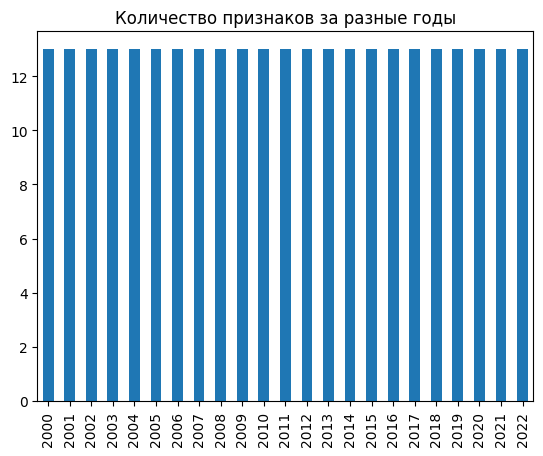

In [33]:
for key in Транспорт.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Транспорт[key] = new_df


#########################
# # сразу выбираем только те признаки, которые есть для всех годов
# total = set()
# for key in Транспорт.keys():
#     total.update(set(Транспорт[key].columns))

# for key in range(2000, 2023):
#     total = total.intersection(set(Транспорт[key].columns))
# total = np.array(list(total))

# for key in range(2000, 2023):
#     buff_df = pd.DataFrame()
#     buff_df['object_name'] = Транспорт[key]['object_name']
#     buff_df['object_level'] = Транспорт[key]['object_level']
#     buff_df['year'] = Транспорт[key]['year']

#     for feature in sorted(total):
#         buff_df[feature] = Транспорт[key][feature]
    
#     Транспорт[key] = buff_df
# #########################


total = set()
for key in Транспорт.keys():
    total.update(set(Транспорт[key].columns))

for key in range(2000, 2023):
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Транспорт[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Транспорт[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_17_socio_economic_102_v20240607 (Информационные и коммуникационные технологии) - EXCLUDED

# data_18_socio_economic_102_v20240607 (Наука и инновации)

In [37]:
df = pd.read_excel('data_18_socio_economic_102_v20240607.xlsx')

In [38]:
df.head()

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Наука и инновации,Y4171801000000,"Организации, выполнявшие научные исследования ...",CD,Российская Федерация,страна,0,0,2000,4099.0,ND,CD,Регионы России. Социально-экономические показа...
1,Наука и инновации,Y4171801000000,"Организации, выполнявшие научные исследования ...",CD,Российская Федерация,страна,0,0,2001,4037.0,ND,CD,Регионы России. Социально-экономические показа...
2,Наука и инновации,Y4171801000000,"Организации, выполнявшие научные исследования ...",CD,Российская Федерация,страна,0,0,2002,3906.0,ND,CD,Регионы России. Социально-экономические показа...
3,Наука и инновации,Y4171801000000,"Организации, выполнявшие научные исследования ...",CD,Российская Федерация,страна,0,0,2003,3797.0,ND,CD,Регионы России. Социально-экономические показа...
4,Наука и инновации,Y4171801000000,"Организации, выполнявшие научные исследования ...",CD,Российская Федерация,страна,0,0,2004,3656.0,ND,CD,Регионы России. Социально-экономические показа...


In [39]:
try:
    # если не выполнено, то требуется ручная обработка
    assert(list(df['subsection'].unique()) == ['CD'])
    print("ВЫПОЛНЕНО")
except:
    print("НЕ ВЫПОЛНЕНЕНО!!!")

НЕ ВЫПОЛНЕНЕНО!!!


In [40]:
df = df[df['subsection'] == 'CD']
df = df[df['indicator_name'] != 'Инновационная активность организации: Уровень инновационной активности организаций']
df = df[df['indicator_name'] != 'Инновационная активность организаций: Удельный вес организаций, осуществлявших технологические инновации, в общем числе обследованных организаций']

In [41]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [42]:
Наука_и_инновации = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

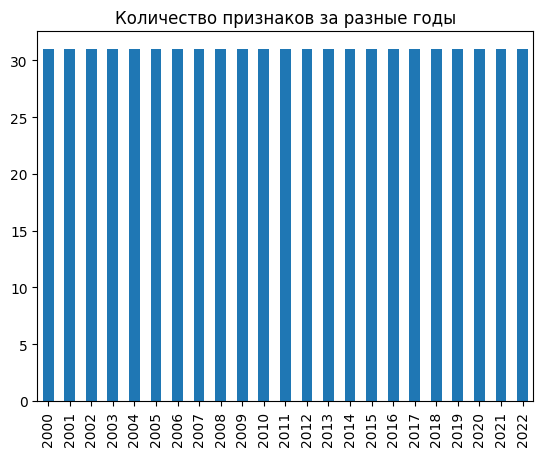

In [43]:
for key in Наука_и_инновации.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Наука_и_инновации[key] = new_df


#########################
# # сразу выбираем только те признаки, которые есть для всех годов
# total = set()
# for key in Наука_и_инновации.keys():
#     total.update(set(Наука_и_инновации[key].columns))

# for key in range(2000, 2023):
#     total = total.intersection(set(Наука_и_инновации[key].columns))
# total = np.array(list(total))

# for key in range(2000, 2023):
#     buff_df = pd.DataFrame()
#     buff_df['object_name'] = Наука_и_инновации[key]['object_name']
#     buff_df['object_level'] = Наука_и_инновации[key]['object_level']
#     buff_df['year'] = Наука_и_инновации[key]['year']

#     for feature in sorted(total):
#         buff_df[feature] = Наука_и_инновации[key][feature]
    
#     Наука_и_инновации[key] = buff_df
# #########################


total = set()
for key in Наука_и_инновации.keys():
    total.update(set(Наука_и_инновации[key].columns))

for key in range(2000, 2023):
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Наука_и_инновации[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Наука_и_инновации[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_19_socio_economic_102_v20240607 (Финансы)

In [286]:
df = pd.read_excel('data_19_socio_economic_102_v20240607.xlsx')

In [287]:
df.head()

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Финансы,Y4171901000000,Доходы консолидированных бюджетов субъектов Ро...,CD,Российская Федерация,страна,0,0,2000,1065.8,миллионов рублей; для значений в целом по Росс...,По данным Федерального казначейства,Регионы России. Социально-экономические показа...
1,Финансы,Y4171901000000,Доходы консолидированных бюджетов субъектов Ро...,CD,Российская Федерация,страна,0,0,2001,1322.4,миллионов рублей; для значений в целом по Росс...,По данным Федерального казначейства,Регионы России. Социально-экономические показа...
2,Финансы,Y4171901000000,Доходы консолидированных бюджетов субъектов Ро...,CD,Российская Федерация,страна,0,0,2002,1633.6,миллионов рублей; для значений в целом по Росс...,По данным Федерального казначейства,Регионы России. Социально-экономические показа...
3,Финансы,Y4171901000000,Доходы консолидированных бюджетов субъектов Ро...,CD,Российская Федерация,страна,0,0,2003,1930.5,миллионов рублей; для значений в целом по Росс...,По данным Федерального казначейства,Регионы России. Социально-экономические показа...
4,Финансы,Y4171901000000,Доходы консолидированных бюджетов субъектов Ро...,CD,Российская Федерация,страна,0,0,2004,2403.2,миллионов рублей; для значений в целом по Росс...,По данным Федерального казначейства,Регионы России. Социально-экономические показа...


In [288]:
try:
    # если не выполнено, то требуется ручная обработка
    assert(list(df['subsection'].unique()) == ['CD'])
    print("ВЫПОЛНЕНО")
except:
    print("НЕ ВЫПОЛНЕНЕНО!!!")

ВЫПОЛНЕНО


In [289]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [290]:
Финансы = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

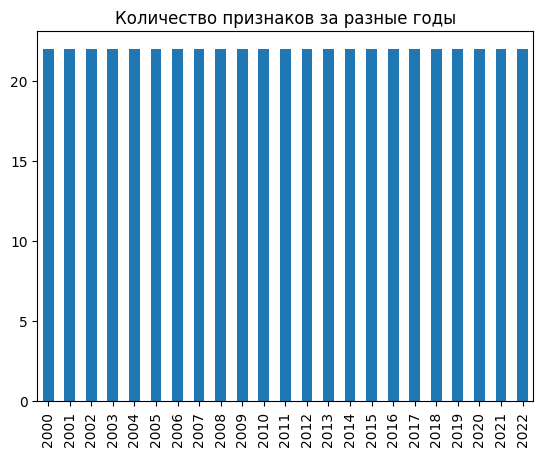

In [291]:
for key in Финансы.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Финансы[key] = new_df


########################
# сразу выбираем только те признаки, которые есть для всех годов
total = set()
for key in Финансы.keys():
    total.update(set(Финансы[key].columns))

for key in range(2000, 2023):
    total = total.intersection(set(Финансы[key].columns))
total = np.array(list(total))

for key in range(2000, 2023):
    buff_df = pd.DataFrame()
    buff_df['object_name'] = Финансы[key]['object_name']
    buff_df['object_level'] = Финансы[key]['object_level']
    buff_df['year'] = Финансы[key]['year']

    for feature in sorted(total):
        buff_df[feature] = Финансы[key][feature]
    
    Финансы[key] = buff_df
#########################


total = set()
for key in Финансы.keys():
    total.update(set(Финансы[key].columns))

for key in range(2000, 2023):
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Финансы[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Финансы[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

In [306]:
x = Финансы[2019]['Отдельные показатели деятельности страховщиков: Страховые премии (взносы) (миллионов рублей)'].apply(lambda x: np.nan if x < 0 else x)
Финансы[2019]['Отдельные показатели деятельности страховщиков: Страховые премии (взносы) (миллионов рублей)'] = x

# data_20_socio_economic_102_v20240607 (Цены и тарифы)

In [52]:
df = pd.read_excel('data_20_socio_economic_102_v20240607.xlsx')

In [53]:
df.head()

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Цены и тарифы,Y4172001000000,Индексы потребительских цен,CD,Российская Федерация,страна,0,0,2000,120.2,"декабрь к декабрю предыдущего года, в процентах",Данные за 2014 г. приведены без учета сведений...,Регионы России. Социально-экономические показа...
1,Цены и тарифы,Y4172001000000,Индексы потребительских цен,CD,Российская Федерация,страна,0,0,2001,118.6,"декабрь к декабрю предыдущего года, в процентах",Данные за 2014 г. приведены без учета сведений...,Регионы России. Социально-экономические показа...
2,Цены и тарифы,Y4172001000000,Индексы потребительских цен,CD,Российская Федерация,страна,0,0,2002,115.1,"декабрь к декабрю предыдущего года, в процентах",Данные за 2014 г. приведены без учета сведений...,Регионы России. Социально-экономические показа...
3,Цены и тарифы,Y4172001000000,Индексы потребительских цен,CD,Российская Федерация,страна,0,0,2003,112.0,"декабрь к декабрю предыдущего года, в процентах",Данные за 2014 г. приведены без учета сведений...,Регионы России. Социально-экономические показа...
4,Цены и тарифы,Y4172001000000,Индексы потребительских цен,CD,Российская Федерация,страна,0,0,2004,111.7,"декабрь к декабрю предыдущего года, в процентах",Данные за 2014 г. приведены без учета сведений...,Регионы России. Социально-экономические показа...


In [54]:
try:
    # если не выполнено, то требуется ручная обработка
    assert(list(df['subsection'].unique()) == ['CD'])
    print("ВЫПОЛНЕНО")
except:
    print("НЕ ВЫПОЛНЕНЕНО!!!")

ВЫПОЛНЕНО


In [55]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [56]:
neeeded = df['indicator_name'].value_counts()[df['indicator_name'].value_counts() >= 2208].index
df = df[df['indicator_name'].isin(neeeded)]

In [57]:
dfs = []

for name in df['indicator_name'].unique():
    df1 = df[df['indicator_name'] == name]
    if len(list(df1['indicator_unit'].unique())) == 1:
        df1 = df1[['indicator_name', 'object_name', 'object_level', 'year', 'indicator_value', 'indicator_unit']]
    else:
        df1 = df1[['indicator_name', 'object_name', 'object_level', 'year', 'indicator_value', 'indicator_unit']]
        if name == 'Стоимость фиксированного набора потребительских товаров и услуг: Стоимость фиксированного набора':
            for i in range(2):
                df0 = df1[df1['indicator_unit'] == df1['indicator_unit'].unique()[i]].copy()
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -99999999, np.nan)
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -77777777, np.nan)
                df0['indicator_name'] = df0['indicator_name'] + f' (option_{i})'
                dfs.append(df0)
            continue
        if name == 'Стоимость условного (минимального) набора продуктов питания: Стоимость минимального набора':
            for i in range(2):
                df0 = df1[df1['indicator_unit'] == df1['indicator_unit'].unique()[i]].copy()
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -99999999, np.nan)
                df0['indicator_value'] = df0['indicator_value'].where(df0['indicator_value'] != -77777777, np.nan)
                df0['indicator_name'] = df0['indicator_name'] + f' (option_{i})'
                dfs.append(df0)
            continue
        else:
            print(name)
            continue
    df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -99999999, np.nan)
    df1['indicator_value'] = df1['indicator_value'].where(df1['indicator_value'] != -77777777, np.nan)
    assert(len(df1['indicator_unit'].unique()) == 1)
    dfs.append(df1)

In [58]:
df = pd.concat(dfs, axis=0)

In [59]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [60]:
Цены_и_тарифы = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:


Text(0.5, 1.0, 'Количество признаков за разные годы')

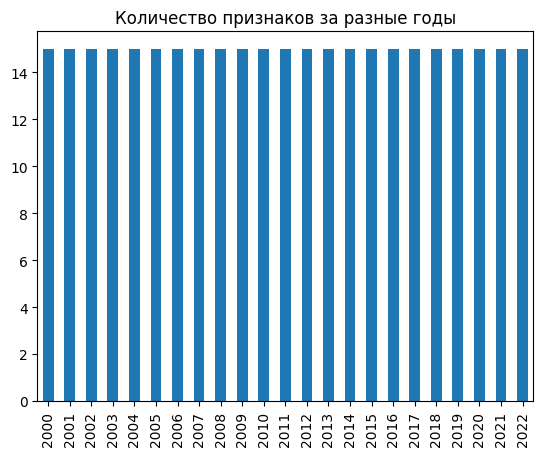

In [61]:
for key in Цены_и_тарифы.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    assert(len(new_df) == 96)
    Цены_и_тарифы[key] = new_df

total = set()
for key in Цены_и_тарифы.keys():
    total.update(set(Цены_и_тарифы[key].columns))

for key in Цены_и_тарифы.keys():
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Цены_и_тарифы[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Цены_и_тарифы[year].columns) - 3 for year in Цены_и_тарифы.keys()}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# data_21_socio_economic_102_v20240607 (Внешняя торговля) - EXCLUDED

In [63]:
df = pd.read_excel('data_21_socio_economic_102_v20240607.xlsx')

In [64]:
df.head()

,section,indicator_code,indicator_name,subsection,object_name,object_level,object_oktmo,object_okato,year,indicator_value,indicator_unit,comment,source
0,Внешняя торговля,Y4172101010000,Внешняя торговля со странами дальнего зарубежь...,CD,Российская Федерация,страна,0,0,2000,89269.2,"в фактически действовавших ценах, миллионов до...",В связи с приостановкой публикации данных стат...,Регионы России. Социально-экономические показа...
1,Внешняя торговля,Y4172101010000,Внешняя торговля со странами дальнего зарубежь...,CD,Российская Федерация,страна,0,0,2001,85352.2,"в фактически действовавших ценах, миллионов до...",В связи с приостановкой публикации данных стат...,Регионы России. Социально-экономические показа...
2,Внешняя торговля,Y4172101010000,Внешняя торговля со странами дальнего зарубежь...,CD,Российская Федерация,страна,0,0,2002,90545.5,"в фактически действовавших ценах, миллионов до...",В связи с приостановкой публикации данных стат...,Регионы России. Социально-экономические показа...
3,Внешняя торговля,Y4172101010000,Внешняя торговля со странами дальнего зарубежь...,CD,Российская Федерация,страна,0,0,2003,113157.0,"в фактически действовавших ценах, миллионов до...",В связи с приостановкой публикации данных стат...,Регионы России. Социально-экономические показа...
4,Внешняя торговля,Y4172101010000,Внешняя торговля со странами дальнего зарубежь...,CD,Российская Федерация,страна,0,0,2004,152248.0,"в фактически действовавших ценах, миллионов до...",В связи с приостановкой публикации данных стат...,Регионы России. Социально-экономические показа...


In [65]:
try:
    # если не выполнено, то требуется ручная обработка
    assert(list(df['subsection'].unique()) == ['CD'])
    print("ВЫПОЛНЕНО")
except:
    print("НЕ ВЫПОЛНЕНЕНО!!!")

ВЫПОЛНЕНО


In [66]:
# все пропуски помечены как np.nan
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -99999999, np.nan)
df['indicator_value'] = df['indicator_value'].where(df['indicator_value'] != -77777777, np.nan)

In [67]:
Внешняя_торговля = {year : None for year in range(2000, 2023)}

В 2000 году не учлись:
В 2001 году не учлись:
В 2002 году не учлись:
В 2003 году не учлись:
В 2004 году не учлись:
В 2005 году не учлись:
В 2006 году не учлись:
В 2007 году не учлись:
В 2008 году не учлись:
В 2009 году не учлись:
В 2010 году не учлись:
В 2011 году не учлись:
В 2012 году не учлись:
В 2013 году не учлись:
В 2014 году не учлись:
В 2015 году не учлись:
В 2016 году не учлись:
В 2017 году не учлись:
В 2018 году не учлись:
В 2019 году не учлись:
В 2020 году не учлись:
В 2021 году не учлись:
В 2022 году не учлись:
~~~ Внешняя торговля со странами СНГ: Экспорт (в фактически действовавших ценах, миллионов долларов США)
~~~ Внешняя торговля со странами СНГ: Импорт (в фактически действовавших ценах, миллионов долларов США)
~~~ Внешняя торговля со странами дальнего зарубежья: Импорт (в фактически действовавших ценах, миллионов долларов США)
~~~ Внешняя торговля со странами дальнего зарубежья: Экспорт (в фактически действовавших ценах, миллионов долларов США)


Text(0.5, 1.0, 'Количество признаков за разные годы')

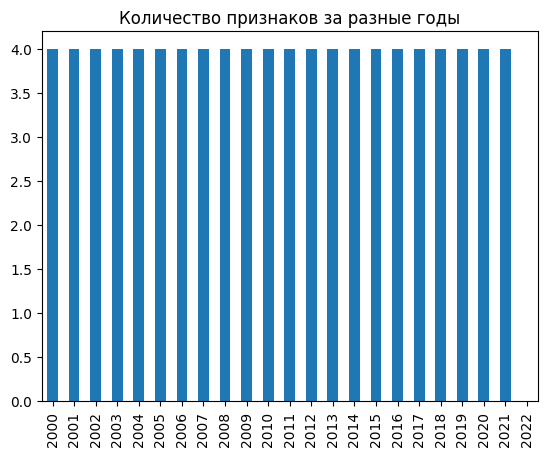

In [68]:
for key in Внешняя_торговля.keys():
    current_df = df[df['year'] == key].copy()
    current_df.loc[:,'feature_name'] = current_df['indicator_name'] + ' (' + current_df['indicator_unit'] + ')'

    # собсвтенно генерация датасета для значения в словаре
    new_df = pd.DataFrame()
    new_df['object_name'] = current_df['object_name'].unique()
    new_df['object_level'] = pd.merge(left=new_df, right=current_df, on='object_name', how='right')['object_level']
    new_df['year'] = key
    for feature_name in sorted(current_df['feature_name'].unique()):
        new_df[feature_name] = pd.merge(left=new_df, right=current_df[current_df['feature_name'] == feature_name], on='object_name', how='right')['indicator_value']

    # проверка, что все регионы были включены 
    Внешняя_торговля[key] = new_df


#########################
# # сразу выбираем только те признаки, которые есть для всех годов
# total = set()
# for key in Внешняя_торговля.keys():
#     total.update(set(Внешняя_торговля[key].columns))

# for key in range(2000, 2023):
#     total = total.intersection(set(Внешняя_торговля[key].columns))
# total = np.array(list(total))

# for key in range(2000, 2023):
#     buff_df = pd.DataFrame()
#     buff_df['object_name'] = Внешняя_торговля[key]['object_name']
#     buff_df['object_level'] = Внешняя_торговля[key]['object_level']
#     buff_df['year'] = Внешняя_торговля[key]['year']

#     for feature in sorted(total):
#         buff_df[feature] = Внешняя_торговля[key][feature]
    
#     Внешняя_торговля[key] = buff_df
# #########################


total = set()
for key in Внешняя_торговля.keys():
    total.update(set(Внешняя_торговля[key].columns))

for key in range(2000, 2023):
    print(f"В {key} году не учлись:")
    for feature in total.difference(set(Внешняя_торговля[key].columns)):
        print(f"~~~ {feature}")

pd.Series({year : len(Внешняя_торговля[year].columns) - 3 for year in range(2000, 2023)}).plot(kind='bar')
plt.title('Количество признаков за разные годы')

# Блок вычислений

**Эталон обработки**

In [322]:
neutral = [
    'object_name',
    'object_level',
    'year',
]

stimulants = [
    'Коэффициенты естественного прироста населения на 1000 человек населения (ND)',
    'Суммарный коэффициент рождаемости (число детей на 1 женщину)',
    # 'Ожидаемая продолжительность жизни при рождении: Все население (число лет)',
    'Ожидаемая продолжительность жизни при рождении: Женщины (число лет)',
    'Ожидаемая продолжительность жизни при рождении: Мужчины (число лет)',
    'Удельный вес городского населения в общей численности населения (оценка на конец года, в процентах)',
]

destimulants = [
    'Коэффициенты демографической нагрузки: Всего (оценка на конец года, на 1000 человек трудоспособного возраста приходится лиц нетрудоспособных возрастов)',
    'Смертность населения в трудоспособном возрасте (число умерших на 100 000 человек соответствующего возраста)',
    'Соотношение браков и разводов (на 1000 браков приходится разводов)',
    'Коэффициенты младенческой смертности (число детей, умерших в возрасте до 1 года, на 1000 родившихся живыми)',
    'Общие коэффициенты смертности (число умерших на 1000 человек населения)',
]

others = [
    
]

# нейтральные добавляются как есть
population = {year : Население[year][neutral].copy() for year in Население.keys()}

#########################
clear_population = {year : Население[year][neutral].copy() for year in Население.keys()}
for year, data in clear_population.items():
    for stim in stimulants:
        data[stim] = Население[year][stim]
for year, data in clear_population.items():
    for destim in destimulants:
        data[destim] = Население[year][destim]
##########################

# стимулянты добавляются как есть
for year, data in population.items():
    for stim in stimulants:
        data[stim] = Население[year][stim]

# дестимулянты инвертируется
for year, data in population.items():
    for destim in destimulants:
        data[destim] = -Население[year][destim]

# для стабильности весов PCA убираются сильно-коррелирующие признаки
population = process_dataframes_to_reduce_multicollinearity(population)
clear_population = process_dataframes_to_reduce_multicollinearity(clear_population)

# другие пока не учитываются
save_hdf5(population, 'processed_data/population')
save_hdf5(clear_population, 'processed_data/clear_population')

In [325]:
neutral = [
    'object_name',
    'object_level',
    'year'
]

stimulants = [
    'Валовой коэффициент охвата дошкольным образованием (на конец года, в процентах от численности детей в возрасте 1‒6 лет)',
    'Выпуск бакалавров, специалистов, магистров (тысяч человек)',
    # 'Выпуск квалифицированных рабочих и служащих (тысяч человек)',
    'Выпуск обучающихся организациями, осуществляющих образовательную деятельность по образовательным программам начального, основного и среднего общего образования: Выпуск обучающихся с аттестатом о среднем общем образовании (тысяч человек)',
    'Выпуск обучающихся организациями, осуществляющих образовательную деятельность по образовательным программам начального, основного и среднего общего образования: Выпуск обучающихся с аттестатом об основном общем образовании (тысяч человек)',
    # 'Выпуск специалистов среднего звена (тысяч человек)',
    # 'Обеспеченность детей дошкольного возраста местами в организациях, осуществляющих образовательную деятельность по образовательным программам дошкольного образования, присмотр и уход за детьми (на конец года, приходится мест на 1000 детей)',
    'Прием на обучение по программам бакалавриата, специалитета, магистратуры (тысяч человек)',
    # 'Прием на обучение по программам подготовки квалифицированных рабочих, служащих (тысяч человек)',
    'Прием на обучение по программам подготовки специалистов среднего звена (тысяч человек)',
    'Численность аспирантов (на конец года, человек)',
    # 'Численность воспитанников организаций, осуществляющих образовательную деятельность по образовательным программам дошкольного образования, присмотр и уход за детьми (на конец года, тысяч человек)',
    'Численность докторантов (на конец года, человек)',
    'Численность обучающихся организаций, осуществляющих образовательную деятельность по образовательным программам начального, основного и среднего общего образования (на начало учебного года, тысяч человек)',
    # 'Численность студентов, обучающихся по программам бакалавриата, специалитета, магистратуры (на начало учебного года, тысяч человек)',
    # 'Численность студентов, обучающихся по программам бакалавриата, специалитета, магистратуры на 10 000 человек населения (на начало учебного года, человек)',
    'Численность студентов, обучающихся по программам подготовки квалифицированных рабочих, служащих (на конец года,тысяч человек)',
    'Численность студентов, обучающихся по программам подготовки специалистов среднего звена (на начало учебного года, тысяч человек)'
]

destimulants = [
    'Удельный вес обучающихся во вторую и третью смены в организациях, осуществляющих образовательную деятельность по образовательным программам начального, основного и среднего общего образования (на начало учебного года, в процентах от общей численности обучающихся)'
]

others = [
    # соотношение приема и выпуска
]

# нейтральные добавляются как есть
education = {year : Образование[year][neutral].copy() for year in Образование.keys()}

#########################
clear_education = {year : Образование[year][neutral].copy() for year in Образование.keys()}
for year, data in clear_education.items():
    for stim in stimulants:
        data[stim] = Образование[year][stim]
for year, data in clear_education.items():
    for destim in destimulants:
        data[destim] = Образование[year][destim]
##########################

# стимулянты добавляются как есть
for year, data in education.items():
    for stim in stimulants:
        data[stim] = Образование[year][stim]
    
    

# дестимулянты инвертируется
for year, data in education.items():
    for destim in destimulants:
        data[destim] = -Образование[year][destim]

# для стабильности весов PCA убираются сильно-коррелирующие признаки
education = process_dataframes_to_reduce_multicollinearity(education)
clear_education = process_dataframes_to_reduce_multicollinearity(clear_education)

# другие пока не учитываются
save_hdf5(education, 'processed_data/education')
save_hdf5(clear_education, 'processed_data/clear_education')

In [610]:
neutral = [
    'object_name',
    'object_level',
    'year'
]

stimulants = [
    'Численность зрителей театров и число посещений музеев на 1000 человек населения: Численность зрителей театров (человек)',
    'Число спортивных сооружений: Стадионы с трибунами на 1500 мест и более (ND)',
    'Коллективные средства размещения: Число коллективных средств размещения (ND)',
    'Число спортивных сооружений: Плавательные бассейны (ND)',
    'Число спортивных сооружений: Спортивные залы (ND)',
    # 'Общедоступные библиотеки: Библиотечный фонд на 1000 человек населения (на конец года, экземпляров)',
    'Число спортивных сооружений: Плоскостные спортивные сооружения (площадки и поля)',
    'Коллективные средства размещения: Численность размещенных лиц (тысяч человек)',
    # 'Общедоступные библиотеки: Численность пользователей (тысяч человек)',
    'Численность зрителей театров и число посещений музеев на 1000 человек населения: Число посещений музеев (человек)',
    # 'Выпуск газет на 1000 человек населения (разовый тираж, экземпляров)'
]

destimulants = [
]

others = [
]

# нейтральные добавляются как есть
culture = {year : Культура_отдых_и_туризм[year][neutral].copy() for year in Культура_отдых_и_туризм.keys()}

#########################
clear_culture = {year : Культура_отдых_и_туризм[year][neutral].copy() for year in Культура_отдых_и_туризм.keys()}
for year, data in clear_culture.items():
    for stim in stimulants:
        data[stim] = Культура_отдых_и_туризм[year][stim]
for year, data in clear_culture.items():
    for destim in destimulants:
        data[destim] = Культура_отдых_и_туризм[year][destim]
##########################

# стимулянты добавляются как есть
for year, data in culture.items():
    for stim in stimulants:
        data[stim] = Культура_отдых_и_туризм[year][stim]
    
    

# дестимулянты инвертируется
for year, data in culture.items():
    for destim in destimulants:
        data[destim] = -Культура_отдых_и_туризм[year][destim]

# для стабильности весов PCA убираются сильно-коррелирующие признаки
culture = process_dataframes_to_reduce_multicollinearity(culture)
clear_culture = process_dataframes_to_reduce_multicollinearity(clear_culture)

# другие пока не учитываются
save_hdf5(culture, 'processed_data/culture')
save_hdf5(clear_culture, 'processed_data/clear_culture')

In [611]:
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Изменение среднегодовой численности занятых (в процентах к предыдущему году)',
    'Нагрузка незанятого населения, состоящего на регистрационном учете в органах службы занятости населения, в расчете на одну заявленную вакансию (на конец года, человек)',
    'Потребность в работниках, заявленная работодателями в органы службы занятости населения (на конец года, человек)',
    'Среднегодовая численность занятых (тысяч человек)',
    'Уровень занятости населения (по данным выборочных обследований рабочей силы, в процентах)',
    'Уровень занятости населения в трудоспособном возрасте (по данным выборочных обследований рабочей силы, в процентах)',
    'Уровень участия в составе рабочей силы (по данным выборочных обследований рабочей силы, в процентах)',
    'Численность рабочей силы (по данным выборочных обследований рабочей силы, тысяч человек)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    'Уровень безработицы: Уровень безработицы (по данным выборочных обследований рабочей силы, в процентах)',
    'Уровень безработицы: Уровень безработицы в трудоспособном возрасте (по данным выборочных обследований рабочей силы, в процентах)',
    'Уровень безработицы: Уровень зарегистрированной безработицы (на конец года, в процентах)',
    'Численность безработных (по данным выборочных обследований рабочей силы, тысяч человек)',
    'Численность зарегистрированных безработных (на конец года, тысяч человек)',
    'Численность незанятых граждан, состоящих на учете в органах службы занятости населения в целях поиска подходящей работы (на конец года, тысяч человек)'
]

others = [
    # Здесь можно добавить другие переменные, если нужно
]

# Нейтральные данные добавляются как есть
labor = {year: Труд[year][neutral].copy() for year in Труд.keys()}

#########################
clear_labor = {year: Труд[year][neutral].copy() for year in Труд.keys()}
for year, data in clear_labor.items():
    for stim in stimulants:
        data[stim] = Труд[year][stim]
for year, data in clear_labor.items():
    for destim in destimulants:
        data[destim] = Труд[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in labor.items():
    for stim in stimulants:
        data[stim] = Труд[year][stim]
    
# Дестимулянты инвертируются
for year, data in labor.items():
    for destim in destimulants:
        data[destim] = -Труд[year][destim]

# для стабильности весов PCA убираются сильно-коррелирующие признаки
labor = process_dataframes_to_reduce_multicollinearity(labor)
clear_labor = process_dataframes_to_reduce_multicollinearity(clear_labor)

# Другие переменные пока не учитываются
save_hdf5(labor, 'processed_data/labor')
save_hdf5(clear_labor, 'processed_data/clear_labor')

In [612]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Реальные денежные доходы: Реальная начисленная заработная плата работников организаций (в процентах к предыдущему году)',
    'Реальные денежные доходы: Реальные доходы населения (в процентах к предыдущему году)',
    'Численность занятых, приходящихся на одного пенсионера (в среднем за год, человек)',
    'Среднемесячная номинальная начисленная заработная плата работников организаций (рублей)',
    'Потребительские расходы в среднем на душу населения (в месяц, рублей)',
    'Среднедушевые денежные доходы населения (в месяц, рублей)',
    'Общая площадь жилых помещений, приходящаяся в среднем на одного жителя (на конец года, квадратных метров)',
    'Число собственных легковых автомобилей на 1000 человек населения (на конец года, штук)',
    'Средний размер назначенных пенсий (на 1 января, рублей)',
    'Реальные денежные доходы: Реальный размер назначенных пенсий (в процентах к предыдущему году)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    'Численность населения с денежными доходами ниже границы бедности/величины прожиточного минимума (в процентах от общей численности населения субъекта)',
    'Удельный вес расходов домашних хозяйств на оплату жилищно-коммунальных услуг: В процентах от общей суммы потребительских расходов (по данным Выборочного обследования бюджетов домашних хозяйств)',
    'Предоставление гражданам жилых помещений: Число семей, состоявших на учете в качестве нуждающихся в жилых помещениях (на конец года, тысяч)',
    'Численность пенсионеров: на 1000 человек населения (ND)',
    'Численность пенсионеров: Всего (тысяч человек)',
    'Предоставление гражданам социальной поддержки (льгот) по оплате жилого помещения и коммунальных услуг: Численность граждан, пользующихся социальной поддержкой по оплате жилого помещения и коммунальных услуг (тысяч человек)',
    'Предоставление гражданам субсидий на оплату жилого помещения и коммунальных услуг: Число семей, получавших субсидии на оплату жилого помещения и коммунальных услуг (по состоянию на конец отчетного периода, тысяч)'
]

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = [
    'Потребление мяса и мясопродуктов (включая субпродукты II категории и жир-сырец) на душу населения (в год, килограммов)',
    'Структура денежных доходов населения: Социальные выплаты (в процентах от общего объема денежных доходов)',
    'Потребление хлебных продуктов на душу населения (в год, килограммов)',
    'Жилищный фонд: Сельский жилищный фонд (общая площадь жилых помещений, миллионов квадратных метров)',
    'Структура социальных выплат: Пенсии (в процентах)',
    'Структура использования денежных доходов населения: Покупка товаров и оплата услуг (в процентах от общего объема денежных доходов)',
    'Потребление яиц на душу населения (в год, штук)',
    'Предоставление гражданам социальной поддержки (льгот) по оплате жилого помещения и коммунальных услуг: Среднемесячный размер социальной поддержки на одного пользователя (рублей)',
    'Структура потребительских расходов домашних хозяйств: Покупка непродовольственных товаров (по итогам выборочного обследования бюджетов домашних хозяйств, в процентах)',
    'Потребление сахара на душу населения (в год, килограммов)',
    'Жилищный фонд: Всего (общая площадь жилых помещений, миллионов квадратных метров)',
    'Жилищный фонд: Городской жилищный фонд (общая площадь жилых помещений, миллионов квадратных метров)',
    'Структура социальных выплат: Стипендии (в процентах)',
    'Предоставление гражданам субсидий на оплату жилого помещения и коммунальных услуг: Общая сумма начисленных субсидий на оплату жилого помещения и коммунальных услуг (миллионов рублей)',
    'Предоставление гражданам жилых помещений: Удельный вес семей, состоявших на учете в качестве нуждающихся в жилых помещениях, в общем числе семей (в процентах)',
    'Структура потребительских расходов домашних хозяйств: Покупка алкогольных напитков (по итогам выборочного обследования бюджетов домашних хозяйств, в процентах)',
    'Структура использования денежных доходов населения: Из него прирост (уменьшение) денег у населения (в процентах от общего объема денежных доходов)',
    'Структура социальных выплат: Страховые возмещения (в процентах)',
    'Предоставление гражданам субсидий на оплату жилого помещения и коммунальных услуг: Среднемесячный размер субсидий на семью (на конец отчетного периода, рублей)',
    'Структура потребительских расходов домашних хозяйств: Оплата услуг (по итогам выборочного обследования бюджетов домашних хозяйств, в процентах)',
    'Структура использования денежных доходов населения: Обязательные платежи и разнообразные взносы (в процентах от общего объема денежных доходов)',
    'Удельный вес расходов домашних хозяйств на оплату жилищно-коммунальных услуг: В процентах от общей суммы расходов на оплату услуг (по итогам выборочного обследования бюджетов домашних хозяйств)',
    'Предоставление гражданам жилых помещений: Удельный вес семей, получивших жилые помещения, в числе семей, состоявших на учете в качестве нуждающихся в жилых помещениях (в процентах)',
    'Структура использования денежных доходов населения: Прирост финансовых активов (в процентах от общего объема денежных доходов)',
    'Потребление молока и молочных продуктов на душу населения (в год, килограммов)',
    'Структура денежных доходов населения: Доходы от собственности (в процентах от общего объема денежных доходов)',
    'Предоставление гражданам жилых помещений: Число семей, получивших жилые помещения и улучшивших жилищные условия за год (тысяч)',
    'Структура социальных выплат: Пособия и социальная помощь (в процентах)',
    'Потребление растительного масла на душу населения (в год, килограммов)',
    'Предоставление гражданам социальной поддержки (льгот) по оплате жилого помещения и коммунальных услуг: Объем средств, предусмотренных на предоставление гражданам социальной поддержки по оплате жилого помещения и коммунальных услуг (миллионов рублей)',
    'Структура использования денежных доходов населения: Приобретение недвижимости (в процентах от общего объема денежных доходов)',
    'Структура потребительских расходов домашних хозяйств: Покупка продуктов питания (по итогам выборочного обследования бюджетов домашних хозяйств, в процентах)'
]

# Нейтральные данные добавляются как есть
wellbeing = {year: Уровень_жизни_населения[year][neutral].copy() for year in Уровень_жизни_населения.keys()}

#########################
clear_wellbeing = {year: Уровень_жизни_населения[year][neutral].copy() for year in Уровень_жизни_населения.keys()}
for year, data in clear_wellbeing.items():
    for stim in stimulants:
        data[stim] = Уровень_жизни_населения[year][stim]
for year, data in clear_wellbeing.items():
    for destim in destimulants:
        data[destim] = Уровень_жизни_населения[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in wellbeing.items():
    for stim in stimulants:
        data[stim] = Уровень_жизни_населения[year][stim]
    
# Дестимулянты инвертируются
for year, data in wellbeing.items():
    for destim in destimulants:
        data[destim] = -Уровень_жизни_населения[year][destim]

# для стабильности весов PCA убираются сильно-коррелирующие признаки
wellbeing = process_dataframes_to_reduce_multicollinearity(wellbeing)
clear_wellbeing = process_dataframes_to_reduce_multicollinearity(clear_wellbeing)

# Другие переменные пока не учитываются
save_hdf5(wellbeing, 'processed_data/wellbeing')
save_hdf5(clear_wellbeing, 'processed_data/clear_wellbeing')

In [614]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'year',
    'object_level',
    'object_name'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Численность врачей всех специальностей: Всего (тысяч человек)',
    'Число больничных коек: Всего (на конец года, тысяч коек)',
    'Число больничных коек: На 10 000 человек населения (на конец года, коек)',
    'Мощность амбулаторно-поликлинических организаций: Всего (на конец года, тысяч посещений в смену)',
    'Мощность амбулаторно-поликлинических организаций: На 10 000 человек населения (на конец года, посещений в смену)',
    'Численность среднего медицинского персонала: Всего (на конец года, тысяч человек)',
    'Численность врачей всех специальностей: На 10 000 человек населения (человек)',
    'Численность среднего медицинского персонала: На 10 000 человек населения (на конец года, человек)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    'Прерывание беременности (аборты): На 1000 женщин 15‒49 лет (ND)',
    'Численность населения на одну больничную койку (на конец года, человек)',
    'Прерывание беременности (аборты): На 100 родов (ND)',
    'Нагрузка на работников сферы здравоохранения: Численность населения на одного работника среднего медицинского персонала (на конец года, человек)',
    'Нагрузка на работников сферы здравоохранения: Численность населения на одного врача (на конец года, человек)'
]

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = []

# Нейтральные данные добавляются как есть
healthcare = {year: Здравоохранение[year][neutral].copy() for year in Здравоохранение.keys()}

#########################
clear_healthcare = {year: Здравоохранение[year][neutral].copy() for year in Здравоохранение.keys()}
for year, data in clear_healthcare.items():
    for stim in stimulants:
        data[stim] = Здравоохранение[year][stim]
for year, data in clear_healthcare.items():
    for destim in destimulants:
        data[destim] = Здравоохранение[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in healthcare.items():
    for stim in stimulants:
        data[stim] = Здравоохранение[year][stim]
    
# Дестимулянты инвертируются
for year, data in healthcare.items():
    for destim in destimulants:
        data[destim] = -Здравоохранение[year][destim]

# для стабильности весов PCA убираются сильно-коррелирующие признаки
healthcare = process_dataframes_to_reduce_multicollinearity(healthcare)
clear_healthcare = process_dataframes_to_reduce_multicollinearity(clear_healthcare)

# Другие переменные пока не учитываются
save_hdf5(healthcare, 'processed_data/healthcare')
save_hdf5(clear_healthcare, 'processed_data/clear_healthcare')

In [615]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'year',
    'object_level',
    'object_name'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Улавливание загрязняющих атмосферу веществ, отходящих от стационарных источников (тысяч тонн; для значений в целом по России: млн т)',
    'Доля уловленных и обезвреженных загрязняющих атмосферу веществ в общем количестве отходящих загрязняющих веществ от стационарных источников (в процентах)',
    'Объем оборотной и последовательно используемой воды (миллионов кубических метров)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    'Сброс загрязненных сточных вод в поверхностные водные объекты (миллионов кубических метров)',
    'Использование свежей воды (миллионов кубических метров)',
    'Выбросы загрязняющих веществ в атмосферный воздух, отходящих от стационарных источников (тысяч тонн; для значений в целом по России: млн т)'
]

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = []

# Нейтральные данные добавляются как есть
nature_and_reserve = {year: Земля_и_охрана_природы[year][neutral].copy() for year in Земля_и_охрана_природы.keys()}

#########################
clear_nature_and_reserve = {year: Земля_и_охрана_природы[year][neutral].copy() for year in Земля_и_охрана_природы.keys()}
for year, data in clear_nature_and_reserve.items():
    for stim in stimulants:
        data[stim] = Земля_и_охрана_природы[year][stim]
for year, data in clear_nature_and_reserve.items():
    for destim in destimulants:
        data[destim] = Земля_и_охрана_природы[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in nature_and_reserve.items():
    for stim in stimulants:
        data[stim] = Земля_и_охрана_природы[year][stim]
    
# Дестимулянты инвертируются
for year, data in nature_and_reserve.items():
    for destim in destimulants:
        data[destim] = -Земля_и_охрана_природы[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
nature_and_reserve = {key: nature_and_reserve[key] for key in sorted(nature_and_reserve.keys())}
clear_nature_and_reserve = {key: clear_nature_and_reserve[key] for key in sorted(clear_nature_and_reserve.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
nature_and_reserve = process_dataframes_to_reduce_multicollinearity(nature_and_reserve)
clear_nature_and_reserve = process_dataframes_to_reduce_multicollinearity(clear_nature_and_reserve)

# Другие переменные пока не учитываются
save_hdf5(nature_and_reserve, 'processed_data/nature_and_reserve')
save_hdf5(clear_nature_and_reserve, 'processed_data/clear_nature_and_reserve')

In [616]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'year',
    'object_level',
    'object_name'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Ввод в действие основных фондов (миллионов рублей)',
    'Стоимость основных фондов (на конец года, по полной учетной стоимости, миллионов рублей)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    'Степень износа основных фондов (на конец года, в процентах)'
]

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = []

# Нейтральные данные добавляются как есть
founds = {year: Основные_фонды[year][neutral].copy() for year in Основные_фонды.keys()}

#########################
clear_founds = {year: Основные_фонды[year][neutral].copy() for year in Основные_фонды.keys()}
for year, data in clear_founds.items():
    for stim in stimulants:
        data[stim] = Основные_фонды[year][stim]
for year, data in clear_founds.items():
    for destim in destimulants:
        data[destim] = Основные_фонды[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in founds.items():
    for stim in stimulants:
        data[stim] = Основные_фонды[year][stim]
    
# Дестимулянты инвертируются
for year, data in founds.items():
    for destim in destimulants:
        data[destim] = -Основные_фонды[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
founds = {key: founds[key] for key in sorted(founds.keys())}
clear_founds = {key: clear_founds[key] for key in sorted(clear_founds.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
founds = process_dataframes_to_reduce_multicollinearity(founds)
clear_founds = process_dataframes_to_reduce_multicollinearity(clear_founds)

# Другие переменные пока не учитываются
save_hdf5(founds, 'processed_data/founds')
save_hdf5(clear_founds, 'processed_data/clear_founds')

In [617]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Инвестиции в основной капитал (в фактически действовавших ценах, миллионов рублей)',
    'Инвестиции в основной капитал на душу населения (в фактически действовавших ценах, рублей)',
    'Индекс физического объема инвестиций в основной капитал (в сопоставимых ценах, в процентах к предыдущему году)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = []

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = []

# Нейтральные данные добавляются как есть
investments = {year: Инвестиции[year][neutral].copy() for year in Инвестиции.keys()}

#########################
clear_investments = {year: Инвестиции[year][neutral].copy() for year in Инвестиции.keys()}
for year, data in clear_investments.items():
    for stim in stimulants:
        data[stim] = Инвестиции[year][stim]
for year, data in clear_investments.items():
    for destim in destimulants:
        data[destim] = Инвестиции[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in investments.items():
    for stim in stimulants:
        data[stim] = Инвестиции[year][stim]
    
# Дестимулянты инвертируются
for year, data in investments.items():
    for destim in destimulants:
        data[destim] = -Инвестиции[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
investments = {key: investments[key] for key in sorted(investments.keys())}
clear_investments = {key: clear_investments[key] for key in sorted(clear_investments.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
investments = process_dataframes_to_reduce_multicollinearity(investments)
clear_investments = process_dataframes_to_reduce_multicollinearity(clear_investments)

# Другие переменные пока не учитываются
save_hdf5(investments, 'processed_data/investments')
save_hdf5(clear_investments, 'processed_data/clear_investments')

In [619]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Сальдированный финансовый результат (прибыль минус убыток) деятельности организаций (миллионов рублей)',
    'Число организаций (на конец года)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    'Просроченная задолженность по заработной плате в расчете на одного работника, перед которым имеется просроченная задолженность (на конец года, рублей)',
    'Просроченная задолженность по заработной плате работникам организаций (на конец года, миллионов рублей)',
    'Удельный вес убыточных организаций (в процентах от общего числа организаций)',
    'Численность работников, перед которыми организация имеет просроченную задолженность по заработной плате (на конец года, тысяч человек)'
]

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = [
    'Дебиторская задолженность организаций: Всего (на конец года, миллионов рублей)',
    'Дебиторская задолженность организаций: Просроченная (на конец года, миллионов рублей)',
    'Кредиторская задолженность организаций: Всего (на конец года, миллионов рублей)',
    'Кредиторская задолженность организаций: Просроченная (на конец года, миллионов рублей)',
]

# Нейтральные данные добавляются как есть
enterprises = {year: Предприятия_и_организации[year][neutral].copy() for year in Предприятия_и_организации.keys()}

#########################
clear_enterprises = {year: Предприятия_и_организации[year][neutral].copy() for year in Предприятия_и_организации.keys()}
for year, data in clear_enterprises.items():
    for stim in stimulants:
        data[stim] = Предприятия_и_организации[year][stim]
for year, data in clear_enterprises.items():
    for destim in destimulants:
        data[destim] = Предприятия_и_организации[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in enterprises.items():
    for stim in stimulants:
        data[stim] = Предприятия_и_организации[year][stim]
    
# Дестимулянты инвертируются
for year, data in enterprises.items():
    for destim in destimulants:
        data[destim] = -Предприятия_и_организации[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
enterprises = {key: enterprises[key] for key in sorted(enterprises.keys())}
clear_enterprises = {key: clear_enterprises[key] for key in sorted(clear_enterprises.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
enterprises = process_dataframes_to_reduce_multicollinearity(enterprises)
clear_enterprises = process_dataframes_to_reduce_multicollinearity(clear_enterprises)

# Другие переменные пока не учитываются
save_hdf5(enterprises, 'processed_data/enterprises')
save_hdf5(clear_enterprises, 'processed_data/clear_enterprises')

In [620]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Валовой сбор зерна (в весе после доработки) (в хозяйствах всех категорий, тысяч тонн; для значений в целом по России: млн т)',
    'Валовой сбор картофеля (в хозяйствах всех категорий, тысяч тонн; для значений в целом по России: млн т)',
    # 'Валовой сбор льноволокна (в хозяйствах всех категорий, тысяч тонн)',
    'Валовой сбор овощей (в хозяйствах всех категорий, тысяч тонн; для значений в целом по России: млн т)',
    'Валовой сбор плодов и ягод (в хозяйствах всех категорий, тысяч тонн)',
    # 'Валовой сбор сахарной свеклы (в хозяйствах всех категорий, тысяч тонн; для значений в целом по России: млн т)',
    # 'Валовой сбор семян подсолнечника (в весе после доработки) (в хозяйствах всех категорий, тысяч тонн)',
    # 'Внесение удобрений на один гектар посева сельскохозяйственных культур в сельскохозяйственных организациях: Минеральные удобрения (в пересчете на 100% питательных веществ) (килограмм)',
    # 'Внесение удобрений на один гектар посева сельскохозяйственных культур в сельскохозяйственных организациях: Органические удобрения (тонн)',
    'Индексы производства продукции сельского хозяйства: Всего (в хозяйствах всех категорий, в сопоставимых ценах, в процентах к предыдущему году)',
    'Индексы производства продукции сельского хозяйства: Продукция животноводства (в хозяйствах всех категорий, в сопоставимых ценах, в процентах к предыдущему году)',
    'Индексы производства продукции сельского хозяйства: Продукция растениеводства (в хозяйствах всех категорий, в сопоставимых ценах, в процентах к предыдущему году)',
    'Лесовосстановление (тысяч гектаров)',
    'Надой молока на одну корову в сельскохозяйственных организациях (килограммов)',
    'Поголовье крупного рогатого скота (в хозяйствах всех категорий, на конец года, тысяч голов)',
    'Поголовье овец и коз (в хозяйствах всех категорий, на конец года, тысяч голов)',
    'Поголовье свиней (в хозяйствах всех категорий, на конец года, тысяч голов)',
    'Посевные площади зерновых и зернобобовых культур (в хозяйствах всех категорий, тысяча гектаров)',
    'Посевные площади картофеля (в хозяйствах всех категорий, тысяч гектаров)',
    # 'Посевные площади льна-долгунца (в хозяйствах всех категорий, тысяча гектаров)',
    'Посевные площади овощей (в хозяйствах всех категорий, тысяч гектаров)',
    # 'Посевные площади подсолнечника (в хозяйствах всех категорий, тысяча гектаров)',
    # 'Посевные площади сахарной свеклы (в хозяйствах всех категорий, тысяча гектаров)',
    'Посевные площади сельскохозяйственных культур (в хозяйствах всех категорий, тысяча гектаров)',
    'Продукция сельского хозяйства (в хозяйствах всех категорий, в фактически действовавших ценах, миллионов рублей)',
    'Производство меда (в хозяйствах всех категорий, тонн)',
    'Производство молока (в хозяйствах всех категорий, тысяч тонн)',
    'Производство скота и птицы на убой (в убойном весе) (в хозяйствах всех категорий, тысяч тонн)',
    'Производство шерсти (в хозяйствах всех категорий, в физическом весе, тонн)',
    'Производство яиц (в хозяйствах всех категорий, миллионов штук)',
    # 'Средний годовой настриг шерсти с одной овцы в сельскохозяйственных организациях (в физическом весе, килограммов)',
    # 'Средняя годовая яйценоскость кур-несушек в сельскохозяйственных организациях (штук)',
    'Урожайность зерновых и зернобобовых культур (в весе после доработки) (в хозяйствах всех категорий, центнеров с одного гектара убранной площади)',
    'Урожайность картофеля (в хозяйствах всех категорий, центнеров с одного гектара убранной площади)',
    # 'Урожайность льна-долгунца (в хозяйствах всех категорий, центнеров льноволокна с одного гектара убранной площади)',
    'Урожайность овощей (в хозяйствах всех категорий, центнеров с одного гектара убранной площади)',
    # 'Урожайность подсолнечника (в хозяйствах всех категорий, центнеров с одного гектара убранной площади)',
    # 'Урожайность сахарной свеклы (в хозяйствах всех категорий, центнеров с одного гектара убранной площади)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    'Лесные пожары на землях лесного фонда и землях иных категорий: Площадь лесных земель, пройденная пожарами (гектар)',
    'Лесные пожары на землях лесного фонда и землях иных категорий: Число лесных пожаров (ND)',
]

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = [
        'Расход кормов в расчете на одну условную голову крупного скота в сельскохозяйственных организациях (центнеров кормовых единиц)'
]

# Нейтральные данные добавляются как есть
agriculture = {year: Сельхоз_и_рыболовство[year][neutral].copy() for year in Сельхоз_и_рыболовство.keys()}

#########################
clear_agriculture = {year: Сельхоз_и_рыболовство[year][neutral].copy() for year in Сельхоз_и_рыболовство.keys()}
for year, data in clear_agriculture.items():
    for stim in stimulants:
        data[stim] = Сельхоз_и_рыболовство[year][stim]
for year, data in clear_agriculture.items():
    for destim in destimulants:
        data[destim] = Сельхоз_и_рыболовство[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in agriculture.items():
    for stim in stimulants:
        data[stim] = Сельхоз_и_рыболовство[year][stim]
    
# Дестимулянты инвертируются
for year, data in agriculture.items():
    for destim in destimulants:
        data[destim] = -Сельхоз_и_рыболовство[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
agriculture = {key: agriculture[key] for key in sorted(agriculture.keys())}
clear_agriculture = {key: clear_agriculture[key] for key in sorted(clear_agriculture.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
agriculture = process_dataframes_to_reduce_multicollinearity(agriculture)
clear_agriculture = process_dataframes_to_reduce_multicollinearity(clear_agriculture)

# Другие переменные пока не учитываются
save_hdf5(agriculture, 'processed_data/agriculture')
save_hdf5(clear_agriculture, 'processed_data/clear_agriculture')

In [621]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Ввод в действие жилых домов, построенных жилищно-строительными кооперативами (тысяч квадратных метров общей площади жилых помещений)',
    'Ввод в действие жилых домов, построенных населением за счет собственных и привлеченных средств (тысяч м2 общей площади жилых помещений)',
    'Ввод в действие жилых домов: Всего (тысяч квадратных метров общей площади жилых помещений)',
    'Ввод в действие жилых домов: На 1000 человек населения (квадратных метров общей площади жилых помещений)',
    'Ввод в действие зданий жилого и нежилого назначения: Общая площадь зданий (тысяч квадратных метров)',
    'Ввод в действие зданий жилого и нежилого назначения: Общий строительный объем зданий (тысяч кубических метров)',
    'Ввод в действие зданий жилого и нежилого назначения: Число зданий (ND)',
    'Ввод в действие квартир: Всего (ND)',
    'Ввод в действие квартир: На 1000 человек населения (ND)',
    'Ввод в действие мощностей амбулаторно-поликлинических организаций: Всего (посещений в смену)',
    'Ввод в действие мощностей амбулаторно-поликлинических организаций: На 100 000 человек населения (посещений в смену)',
    'Ввод в действие мощностей больничных организаций: Всего (коек)',
    'Ввод в действие мощностей больничных организаций: На 100 000 человек населения (коек)',
    'Ввод в действие мощностей общеобразовательных и дошкольных образовательных организаций: Ввод в действие мощностей дошкольных образовательных организаций (мест)',
    'Ввод в действие мощностей общеобразовательных организаций: Ввод в действие мощностей общеобразовательных организаций (ученических мест)',
    'Объем работ, выполненных по виду экономической деятельности «Строительство» (в фактически действовавших ценах, миллионов рублей)',
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
]

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = [
    'Удельный вес жилых домов, построенных населением за счет собственных и привлеченных средств, в общем вводе жилья (в процентах)',
    'Жилые дома, находящиеся в незавершенном строительстве: Общая площадь жилых помещений, тыс. м (ND)',
    'Жилые дома, находящиеся в незавершенном строительстве: Число жилых домов (ND)'
]

# Нейтральные данные добавляются как есть
building = {year: Строительство[year][neutral].copy() for year in Строительство.keys()}

#########################
clear_building = {year: Строительство[year][neutral].copy() for year in Строительство.keys()}
for year, data in clear_building.items():
    for stim in stimulants:
        data[stim] = Строительство[year][stim]
for year, data in clear_building.items():
    for destim in destimulants:
        data[destim] = Строительство[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in building.items():
    for stim in stimulants:
        data[stim] = Строительство[year][stim]
    
# Дестимулянты инвертируются
for year, data in building.items():
    for destim in destimulants:
        data[destim] = -Строительство[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
building = {key: building[key] for key in sorted(building.keys())}
clear_building = {key: clear_building[key] for key in sorted(clear_building.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
building = process_dataframes_to_reduce_multicollinearity(building)
clear_building = process_dataframes_to_reduce_multicollinearity(clear_building)

# Другие переменные пока не учитываются
save_hdf5(building, 'processed_data/building')
save_hdf5(clear_building, 'processed_data/clear_building')

In [492]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Индексы физического объема оборота розничной торговли (в сопоставимых ценах, в процентах к предыдущему году)',
    'Оборот общественного питания (в фактически действовавших ценах, миллионов рублей; для значений в целом по России: млрд руб)',
    'Оборот общественного питания на душу населения (в фактически действовавших ценах, рублей)',
    'Оборот оптовой торговли: Всего (миллионов рублей; для значений в целом по России: млрд руб)',
    'Оборот оптовой торговли: Оборот оптовой торговли организаций оптовой торговли (миллионов рублей; для значений в целом по России: млрд руб)',
    'Оборот розничной торговли (в фактически действовавших ценах, миллионов рублей; для значений в целом по России: млрд руб)',
    'Оборот розничной торговли на душу населения (в фактически действовавших ценах, рублей)',
    'Объем бытовых услуг населению: Всего (миллионов рублей)',
    'Объем бытовых услуг: На душу населения (рублей)',
    'Объем коммунальных услуг населению: Всего (миллионов рублей)',
    'Объем коммунальных услуг: На душу населения (рублей)',
    'Объем платных услуг населению: Всего (миллионов рублей)',
    # 'Объем платных услуг населению: Индексы физического объема платных услуг населению (в процентах к предыдущему году)',
    'Объем платных услуг: На душу населения (рублей)',
    'Объем телекоммуникационных услуг населению: Всего (миллионов рублей)',
    'Объем телекоммуникационных услуг населению: На душу населения (рублей)',
    'Объем транспортных услуг населению: Всего (миллионов рублей)',
    'Объем транспортных услуг: На душу населения (рублей)',
    'Продажа товаров на розничных рынках и ярмарках (в фактически действовавших ценах, миллионов рублей; для значений в целом по России: млрд руб)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = []

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = [
    'Структура оборота розничной торговли: Непродовольственные товары (в фактически действовавших ценах, в процентах от общего объема оборота розничной торговли субъекта Российской Федерации)',
    'Структура оборота розничной торговли: Пищевые продукты, включая напитки, и табачные изделия (в фактически действовавших ценах, в процентах от общего объема оборота розничной торговли субъекта Российской Федерации)'
]

# Нейтральные данные добавляются как есть
goods_and_services = {year: Торговля_и_услуги_населению[year][neutral].copy() for year in Торговля_и_услуги_населению.keys()}

#########################
clear_goods_and_services = {year: Торговля_и_услуги_населению[year][neutral].copy() for year in Торговля_и_услуги_населению.keys()}
for year, data in clear_goods_and_services.items():
    for stim in stimulants:
        data[stim] = Торговля_и_услуги_населению[year][stim]
for year, data in clear_goods_and_services.items():
    for destim in destimulants:
        data[destim] = Торговля_и_услуги_населению[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in goods_and_services.items():
    for stim in stimulants:
        data[stim] = Торговля_и_услуги_населению[year][stim]
    
# Дестимулянты инвертируются
for year, data in goods_and_services.items():
    for destim in destimulants:
        data[destim] = -Торговля_и_услуги_населению[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
goods_and_services = {key: goods_and_services[key] for key in sorted(goods_and_services.keys())}
goods_and_services = {key: goods_and_services[key] for key in sorted(goods_and_services.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
goods_and_services = process_dataframes_to_reduce_multicollinearity(goods_and_services)
clear_goods_and_services = process_dataframes_to_reduce_multicollinearity(clear_goods_and_services)

# Другие переменные пока не учитываются
save_hdf5(goods_and_services, 'processed_data/goods_and_services')
save_hdf5(clear_goods_and_services, 'processed_data/clear_goods_and_services')

In [624]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Грузооборот автомобильного транспорта организаций всех видов деятельности (миллионов тонно-километров)',
    'Отправление грузов железнодорожным транспортом общего пользования (миллионов тонн)',
    'Отправление пассажиров железнодорожным транспортом общего пользования (тысяч человек)',
    'Пассажирооборот автобусов общего пользования (миллионов пассажиро-километров)',
    'Перевозки грузов автомобильным транспортом организаций всех видов деятельности (миллионов тонн)',
    'Перевозки пассажиров автобусами общего пользования (миллионов человек)',
    'Плотность автомобильных дорог общего пользования с твердым покрытием (на конец года, км путей на 1000 км2 территории)',
    'Плотность железнодорожных путей общего пользования (на конец года, км путей на 10000 км2 территории)',
    'Удельный вес автомобильных дорог с твердым покрытием в общей протяженности автомобильных дорог общего пользования (на конец года, в процентах)',
    'Удельный вес автомобильных дорог с усовершенствованным покрытием в протяженности автомобильных дорог с твердым покрытием общего пользования (в процентах)',
    'Число автобусов общего пользования на 100 000 человек населения (на конец года, штук)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    'Число дорожно-транспортных происшествий на 100 000 человек населения (ND)',
    'Число лиц, погибших в дорожно-транспортных происшествиях на 100 000 человек населения (человек)'
]

# Нейтральные данные добавляются как есть
transport = {year: Транспорт[year][neutral].copy() for year in Транспорт.keys()}

#########################
clear_transport = {year: Транспорт[year][neutral].copy() for year in Транспорт.keys()}
for year, data in clear_transport.items():
    for stim in stimulants:
        data[stim] = Транспорт[year][stim]
for year, data in clear_transport.items():
    for destim in destimulants:
        data[destim] = Транспорт[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in transport.items():
    for stim in stimulants:
        data[stim] = Транспорт[year][stim]
    
# Дестимулянты инвертируются
for year, data in transport.items():
    for destim in destimulants:
        data[destim] = -Транспорт[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
transport = {key: transport[key] for key in sorted(transport.keys())}
clear_transport = {key: clear_transport[key] for key in sorted(clear_transport.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
transport = process_dataframes_to_reduce_multicollinearity(transport)
clear_transport = process_dataframes_to_reduce_multicollinearity(clear_transport)

# Другие переменные пока не учитываются
save_hdf5(transport, 'processed_data/transport')
save_hdf5(clear_transport, 'processed_data/clear_transport')

In [650]:
Наука_и_инновации[2000].columns

Index(['object_name', 'object_level', 'year',
       'Внутренние затраты на научные исследования и разработки (миллионов рублей)',
       'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Всего (миллионов рублей)',
       'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Другие материальные затраты (миллионов рублей)',
       'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Оплата труда (миллионов рублей)',
       'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Приобретение оборудования (миллионов рублей)',
       'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Прочие текущие затраты (миллионов рублей)',
       'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Страховые взносы на опс, омс, осс (миллионов рублей)',
       'Внутренние текущие затраты на научные исследования и разработки по вида

In [665]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Внутренние затраты на научные исследования и разработки (миллионов рублей)',
    'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Всего (миллионов рублей)',
    'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Оплата труда (миллионов рублей)',
    'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Приобретение оборудования (миллионов рублей)',
    'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Страховые взносы на опс, омс, осс (миллионов рублей)',
    'Внутренние текущие затраты на научные исследования и разработки по видам работ: Всего (миллионов рублей)',
    'Внутренние текущие затраты на научные исследования и разработки по видам работ: Прикладные исследования (миллионов рублей)',
    'Внутренние текущие затраты на научные исследования и разработки по видам работ: Разработки (миллионов рублей)',
    'Внутренние текущие затраты на научные исследования и разработки по видам работ: Фундаментальные исследования (миллионов рублей)',
    'Затраты на инновационную деятельность организаций: Всего (миллионов рублей)',
    'Используемые передовые производственные технологии (ND)',
    'Капитальные затраты на научные исследования и разработки (миллионов рублей)',
    'Объем инновационных товаров, работ, услуг: Всего (миллионов рублей)',
    'Объем инновационных товаров, работ, услуг: В процентах от общего объема отгруженных товаров, выполненных работ, услуг (в процентах)',
    'Организации, выполнявшие научные исследования и разработки (ND)',
    'Поступление патентных заявок и выдача патентов в России: Выдано патентов на избретения (единиц)',
    'Поступление патентных заявок и выдача патентов в России: Выдано патентов на полезные модели (единиц)',
    'Поступление патентных заявок и выдача патентов в России: Подано патентных заявок на изобретения (единиц)',
    'Поступление патентных заявок и выдача патентов в России: Подано патентных заявок на полезные модели (единиц)',
    'Разработанные передовые производственные технологии (ND)',
    'Численность исследователей с учеными степенями: Всего (человек)',
    'Численность исследователей с учеными степенями: С ученой степенью доктора наук (человек)',
    'Численность исследователей с учеными степенями: С ученой степенью кандидата наук (человек)',
    'Численность персонала, занятого научными исследованиями и разработками (человек)',
    'Численность персонала, занятого научными исследованиями и разработками, по категориям: Исследователи (человек)',
    'Численность персонала, занятого научными исследованиями и разработками, по категориям: Техники (человек)',
    'Численность персонала, занятого научными исследованиями и разработками, по категориям: Вспомогательный персонал (человек)'
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = []

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = [
    'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Другие материальные затраты (миллионов рублей)',
    'Внутренние текущие затраты на научные исследования и разработки по видам затрат: Прочие текущие затраты (миллионов рублей)',
    'Численность персонала, занятого научными исследованиями и разработками, по категориям: Прочие (человек)'
]

# Нейтральные данные добавляются как есть
r_and_d = {year: Наука_и_инновации[year][neutral].copy() for year in Наука_и_инновации.keys()}

#########################
clear_r_and_d = {year: Наука_и_инновации[year][neutral].copy() for year in Наука_и_инновации.keys()}
for year, data in clear_r_and_d.items():
    for stim in stimulants:
        data[stim] = Наука_и_инновации[year][stim]
for year, data in clear_r_and_d.items():
    for destim in destimulants:
        data[destim] = Наука_и_инновации[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in r_and_d.items():
    for stim in stimulants:
        data[stim] = Наука_и_инновации[year][stim]
    
# Дестимулянты инвертируются
for year, data in r_and_d.items():
    for destim in destimulants:
        data[destim] = -Наука_и_инновации[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
r_and_d = {key: r_and_d[key] for key in sorted(r_and_d.keys())}
clear_r_and_d = {key: clear_r_and_d[key] for key in sorted(clear_r_and_d.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
r_and_d = process_dataframes_to_reduce_multicollinearity(r_and_d)
clear_r_and_d = process_dataframes_to_reduce_multicollinearity(clear_r_and_d)

# Другие переменные пока не учитываются
save_hdf5(r_and_d, 'processed_data/r_and_d')
save_hdf5(clear_r_and_d, 'processed_data/clear_r_and_d')

In [693]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = []

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    'Индексы потребительских цен (декабрь к декабрю предыдущего года, в процентах)',
    'Индексы потребительских цен (тарифов) на услуги (декабрь к декабрю предыдущего года, в процентах)',
    'Индексы потребительских цен на непродовольственные товары (декабрь к декабрю предыдущего года, в процентах)',
    'Индексы потребительских цен на продовольственные товары (декабрь к декабрю предыдущего года, в процентах)',
    'Индексы тарифов на грузовые перевозки (декабрь к декабрю предыдущего года, в процентах)',
    'Индексы цен на вторичном рынке жилья (на конец года, в процентах к концу предыдущего года)',
    'Индексы цен на первичном рынке жилья (на конец года, в процентах к концу предыдущего года)',
    'Индексы цен производителей на строительную продукцию (декабрь к декабрю предыдущего года, в процентах)',
    'Стоимость условного (минимального) набора продуктов питания: Изменение стоимости минимального набора (на конец года, к декабрю предыдущего года, в процентах)'
]

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = [
    'Средние цены на вторичном рынке жилья (на конец года, рублей за квадратный метр общей площади)',
    'Средние цены на первичном рынке жилья (на конец года, рублей за квадратный метр общей площади)',
    'Стоимость условного (минимального) набора продуктов питания: Стоимость минимального набора (option_0) (рублей)',
    'Стоимость условного (минимального) набора продуктов питания: Стоимость минимального набора (option_1) (на конец года, в процентах к среднероссийской стоимости)',
    'Стоимость фиксированного набора потребительских товаров и услуг: Стоимость фиксированного набора (option_0) (рублей)',
    'Стоимость фиксированного набора потребительских товаров и услуг: Стоимость фиксированного набора (option_1) (на конец года, в процентах к среднероссийской стоимости)'
]

# Нейтральные данные добавляются как есть
prices_and_tariffes = {year: Цены_и_тарифы[year][neutral].copy() for year in Цены_и_тарифы.keys()}

#########################
clear_prices_and_tariffes = {year: Цены_и_тарифы[year][neutral].copy() for year in Цены_и_тарифы.keys()}
for year, data in clear_prices_and_tariffes.items():
    for stim in stimulants:
        data[stim] = Цены_и_тарифы[year][stim]
for year, data in clear_prices_and_tariffes.items():
    for destim in destimulants:
        data[destim] = Цены_и_тарифы[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in prices_and_tariffes.items():
    for stim in stimulants:
        data[stim] = Цены_и_тарифы[year][stim]
    
# Дестимулянты инвертируются
for year, data in prices_and_tariffes.items():
    for destim in destimulants:
        data[destim] = -Цены_и_тарифы[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
prices_and_tariffes = {key: prices_and_tariffes[key] for key in sorted(prices_and_tariffes.keys())}
clear_prices_and_tariffes = {key: clear_prices_and_tariffes[key] for key in sorted(clear_prices_and_tariffes.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
prices_and_tariffes = process_dataframes_to_reduce_multicollinearity(prices_and_tariffes)
clear_prices_and_tariffes = process_dataframes_to_reduce_multicollinearity(clear_prices_and_tariffes)

# Другие переменные пока не учитываются
save_hdf5(prices_and_tariffes, 'processed_data/prices_and_tariffes')
save_hdf5(clear_prices_and_tariffes, 'processed_data/clear_prices_and_tariffes')

## СБОРКА ФИНАНСЫ (Добавлены новые признаки на основе представленных)

In [404]:
# генерация новых признаков для Финансов

for year in Финансы.keys():
    col_1 = 'Доходы консолидированных бюджетов субъектов Российской Федерации (миллионов рублей; для значений в целом по России: млрд руб)'
    col_2 = 'Расходы консолидированных бюджетов субъектов Российской Федерации (миллионов рублей; для значений в целом по России: млрд руб)'
    Финансы[year]['Доходы к расходам'] =  Финансы[year][col_1] / Финансы[year][col_2] 
    Финансы[year]['Степень неоптимальности бюджета'] = np.abs(1 - Финансы[year]['Доходы к расходам'])

    # col_1 = 'Доходы консолидированных бюджетов субъектов Российской Федерации (миллионов рублей; для значений в целом по России: млрд руб)'
    # col_2 = 'Расходы консолидированных бюджетов субъектов Российской Федерации (миллионов рублей; для значений в целом по России: млрд руб)'
    # Финансы[year]['Профицит консолидированного бюджета (миллионов рублей)'] =  Финансы[year][col_1] - Финансы[year][col_2] 

    # есть показтели больше 1 (Конслидированный бюджет и Внебюджетные фоныд: пенсии, социалка, медицинка - это разные источники)
    col_1 = 'Исполнение бюджета пенсионного фонда Российской Федерации: Расходование (миллионов рублей)'
    col_2 = 'Исполнение бюджета фонда социального страхования Российской Федерации: Расходование (миллионов рублей)'
    col_3 = 'Исполнение бюджетов территориальных фондов обязательного медицинского страхования: Расходование (миллионов рублей)'
    col_4 = 'Расходы консолидированных бюджетов субъектов Российской Федерации (миллионов рублей; для значений в целом по России: млрд руб)'
    Финансы[year]['Соотношение ВБ и КБ'] = (Финансы[year][col_1] + Финансы[year][col_2] + Финансы[year][col_3]) / (Финансы[year][col_4])
    Финансы[year]['Степень соразмерности ВБ и КБ субъекта'] = Финансы[year]['Соотношение ВБ и КБ'].apply(lambda x: 1 if x <= 1 else 1 / x)

    # есть показтели больше 1
    col_1 = 'Задолженность по кредитам в рублях, предоставленным кредитными организациями физическим лицам: Всего (исходя из местонахождения заемщиков, на начало года, миллионов рублей)'
    col_2 = 'Задолженность по кредитам в рублях, предоставленным кредитными организациями юридическим лицам (исходя из местонахождения заемщиков, на начало года, миллионов рублей)'
    col_3 = 'Средства (вклады) юридических и физических лиц в рублях, привлеченные кредитными организациями: Всего (исходя из места привлечения средств, на начало года, миллионов рублей)'
    Финансы[year]['Соотношение задолженности к средствам физических и юридических лиц, привлеченных кредитными организациями'] = (Финансы[year][col_1] + Финансы[year][col_2]) / (Финансы[year][col_3])

    col_1 = 'Отдельные показатели деятельности страховщиков: Страховые премии (взносы) (миллионов рублей)'
    col_2 = 'Отдельные показатели деятельности страховщиков: Выплаты по договорам страхования (миллионов рублей)'
    Финансы[year]['Соотношение выплат и взносов'] = Финансы[year][col_2] / Финансы[year][col_1]

    col_1 = 'Средства (вклады) юридических и физических лиц в иностранной валюте, привлеченные кредитными организациями: Всего (исходя из места привлечения средств, на начало года, миллионов рублей)'
    col_2 = 'Средства (вклады) юридических и физических лиц в рублях, привлеченные кредитными организациями: Всего (исходя из места привлечения средств, на начало года, миллионов рублей)'
    Финансы[year]['Доля валютных вкладов'] = Финансы[year][col_1] / (Финансы[year][col_1] + Финансы[year][col_2])

    col_1 = 'Число действующих кредитных организаций (на начало года)'
    col_2 = 'Среднегодовая численность населения (оценка, тысяч человек)'
    Финансы[year]['Кредитные организации на душу населения'] = Финансы[year][col_1] / (Население[year][col_2] * 1_000)

    col_1 = 'Число действующих кредитных организаций (на начало года)'
    col_2 = 'Число действующих филиалов кредитных организаций в субъекте (на начало года)'
    Финансы[year]['Количество филиалов на одну кредитную организацию'] = Финансы[year][col_2] / Финансы[year][col_1]

    col_1 = 'Число действующих кредитных организаций (на начало года)'
    col_2 = 'Число действующих филиалов кредитных организаций в субъекте (на начало года)'
    Финансы[year]['Количество филиалов на одну кредитную организацию'] = Финансы[year][col_2] / Финансы[year][col_1]

    # есть показтели больше 1 (Конслидированный бюджет и Внебюджетные фоныд: пенсии, социалка, медицинка - это разные источники)
    col_1 = 'Исполнение бюджетов территориальных фондов обязательного медицинского страхования: Расходование (миллионов рублей)'
    col_2 = 'Расходы консолидированных бюджетов субъектов Российской Федерации (миллионов рублей; для значений в целом по России: млрд руб)'
    Финансы[year]['Соотношение ТФОМС и КБ'] = Финансы[year][col_1] / Финансы[year][col_2]
    Финансы[year]['Степень соразмерности ТФОМС и КБ'] = Финансы[year]['Соотношение ТФОМС и КБ'].apply(lambda x: 1 if x <= 1 else 0)

    # есть показтели больше 1 (Конслидированный бюджет и Внебюджетные фоныд: пенсии, социалка, медицинка - это разные источники)
    col_1 = 'Исполнение бюджета пенсионного фонда Российской Федерации: Расходование (миллионов рублей)'
    col_2 = 'Расходы консолидированных бюджетов субъектов Российской Федерации (миллионов рублей; для значений в целом по России: млрд руб)'
    Финансы[year]['Соотношение ПФ и КБ'] = Финансы[year][col_1] / Финансы[year][col_2]
    Финансы[year]['Степень соразмерности ПФ и КБ'] = Финансы[year]['Соотношение ПФ и КБ'].apply(lambda x: 1 if x <= 1 else 0)

    col_1 = 'Средства (вклады) юридических и физических лиц в рублях, привлеченные кредитными организациями: Физических лиц (исходя из места привлечения средств, на начало года, миллионов рублей)'
    col_2 = 'Средства (вклады) юридических и физических лиц в рублях, привлеченные кредитными организациями: Всего (исходя из места привлечения средств, на начало года, миллионов рублей)'
    Финансы[year]['Доля вкладов физических лиц'] = Финансы[year][col_1] / Финансы[year][col_2]

    col_1 = 'Задолженность по кредитам в иностранной валюте, предоставленным кредитными организациями физическим лицам: Всего (исходя из местонахождения заемщиков, на начало года, миллионов рублей)'
    col_2 = 'Задолженность по кредитам в иностранной валюте, предоставленным кредитными организациями юридическим лицам (исходя из местонахождения заемщиков, на начало года, миллионов рублей)'
    col_3 = 'Задолженность по кредитам в рублях, предоставленным кредитными организациями физическим лицам: Всего (исходя из местонахождения заемщиков, на начало года, миллионов рублей)'
    col_4 = 'Задолженность по кредитам в рублях, предоставленным кредитными организациями юридическим лицам (исходя из местонахождения заемщиков, на начало года, миллионов рублей)'
    Финансы[year]['Доля валютных кредитов в общем объеме задолженности'] = (Финансы[year][col_1] + Финансы[year][col_2]) / (Финансы[year][col_1] + Финансы[year][col_2] + Финансы[year][col_3] + Финансы[year][col_4])

    col_1 = 'Отдельные показатели деятельности страховщиков: Страховые премии (взносы) (миллионов рублей)'
    col_2 = 'Число действующих кредитных организаций (на начало года)'
    Финансы[year]['Средний размер страховой премии на одну организацию (миллионов рублей)'] = Финансы[year][col_1] / Финансы[year][col_2]

    col_1 = 'Отдельные показатели деятельности страховщиков: Выплаты по договорам страхования (миллионов рублей)'
    col_2 = 'Число действующих кредитных организаций (на начало года)'
    Финансы[year]['Средний размер выплаты на одну организацию (миллионов рублей)'] = Финансы[year][col_1] / Финансы[year][col_2]

    col_1 = 'Отдельные показатели деятельности страховщиков: Выплаты по договорам страхования (миллионов рублей)'
    col_2 = 'Число действующих кредитных организаций (на начало года)'
    Финансы[year]['Средний размер выплаты на одну организацию (миллионов рублей)'] = Финансы[year][col_1] / Финансы[year][col_2]

In [408]:
# Нейтральные колонки (не влияют на классификацию)
neutral = [
    'object_name',
    'object_level',
    'year'
]

# Стимулянты — показатели, которые должны увеличиваться для улучшения ситуации
stimulants = [
    'Доходы консолидированных бюджетов субъектов Российской Федерации (миллионов рублей; для значений в целом по России: млрд руб)',
    # 'Исполнение бюджета пенсионного фонда Российской Федерации: Поступление (миллионов рублей)',
    # 'Исполнение бюджета фонда социального страхования Российской Федерации: Поступление (миллионов рублей)',
    'Исполнение бюджетов территориальных фондов обязательного медицинского страхования: Поступление (миллионов рублей)',
    'Отдельные показатели деятельности страховщиков: Страховые премии (взносы) (миллионов рублей)',
    'Средства (вклады) физических лиц на валютных счетах в ПАО Сбербанк (на начало года, миллионов рублей)',
    'Средства (вклады) физических лиц на рублевых счетах в ПАО Сбербанк (на начало года, миллионов рублей)',
    'Средства (вклады) юридических и физических лиц в иностранной валюте, привлеченные кредитными организациями: Всего (исходя из места привлечения средств, на начало года, миллионов рублей)',
    'Средства (вклады) юридических и физических лиц в иностранной валюте, привлеченные кредитными организациями: Физических лиц (исходя из места привлечения средств, на начало года, миллионов рублей)',
    'Средства (вклады) юридических и физических лиц в рублях, привлеченные кредитными организациями: Всего (исходя из места привлечения средств, на начало года, миллионов рублей)',
    'Средства (вклады) юридических и физических лиц в рублях, привлеченные кредитными организациями: Физических лиц (исходя из места привлечения средств, на начало года, миллионов рублей)',
    'Число действующих кредитных организаций (на начало года)',
    'Число действующих филиалов кредитных организаций в субъекте (на начало года)',
    'Степень соразмерности ВБ и КБ субъекта', ### created
    'Кредитные организации на душу населения', ### created
    'Количество филиалов на одну кредитную организацию', ### created
    'Степень соразмерности ТФОМС и КБ', ### created
    # 'Степень соразмерности ПФ и КБ', ### created
    'Доля вкладов физических лиц', ### created
    'Средний размер страховой премии на одну организацию (миллионов рублей)', ### created
]

# Дестимулянты — показатели, которые должны уменьшаться для улучшения ситуации
destimulants = [
    # 'Задолженность по кредитам в иностранной валюте, предоставленным кредитными организациями физическим лицам: Всего (исходя из местонахождения заемщиков, на начало года, миллионов рублей)',
    # 'Задолженность по кредитам в иностранной валюте, предоставленным кредитными организациями юридическим лицам (исходя из местонахождения заемщиков, на начало года, миллионов рублей)',
    # 'Задолженность по кредитам в рублях, предоставленным кредитными организациями физическим лицам: Всего (исходя из местонахождения заемщиков, на начало года, миллионов рублей)',
    # 'Задолженность по кредитам в рублях, предоставленным кредитными организациями юридическим лицам (исходя из местонахождения заемщиков, на начало года, миллионов рублей)',
    'Расходы консолидированных бюджетов субъектов Российской Федерации (миллионов рублей; для значений в целом по России: млрд руб)',
    'Отдельные показатели деятельности страховщиков: Выплаты по договорам страхования (миллионов рублей)',
    'Степень неоптимальности бюджета', ### created
    # 'Соотношение задолженности к средствам физических и юридических лиц, привлеченных кредитными организациями', ### created
    # 'Соотношение выплат и взносов', ### created
    'Доля валютных вкладов', ### created
    # 'Доля валютных кредитов в общем объеме задолженности', ### created
    'Средний размер выплаты на одну организацию (миллионов рублей)', ### created
]

# Другие — показатели, которые не могут быть однозначно отнесены к стимулянтам или дестимулянтам
others = [
    'Исполнение бюджета пенсионного фонда Российской Федерации: Расходование (миллионов рублей)',
    'Исполнение бюджета фонда социального страхования Российской Федерации: Расходование (миллионов рублей)',
    'Исполнение бюджетов территориальных фондов обязательного медицинского страхования: Расходование (миллионов рублей)'
]

# Нейтральные данные добавляются как есть
finance = {year: Финансы[year][neutral].copy() for year in Финансы.keys()}

#########################
clear_finance = {year: Финансы[year][neutral].copy() for year in Финансы.keys()}
for year, data in clear_finance.items():
    for stim in stimulants:
        data[stim] = Финансы[year][stim]
for year, data in clear_finance.items():
    for destim in destimulants:
        data[destim] = Финансы[year][destim]
##########################

# Стимулянты добавляются как есть
for year, data in finance.items():
    for stim in stimulants:
        data[stim] = Финансы[year][stim]
    
# Дестимулянты инвертируются
for year, data in finance.items():
    for destim in destimulants:
        data[destim] = -Финансы[year][destim]

# Для корректного отображения нужно "отсоритировать словарь по ключам"
finance = {key: finance[key] for key in sorted(finance.keys())}
clear_finance = {key: clear_finance[key] for key in sorted(clear_finance.keys())}

# для стабильности весов PCA убираются сильно-коррелирующие признаки
finance = process_dataframes_to_reduce_multicollinearity(finance)
clear_finance = process_dataframes_to_reduce_multicollinearity(clear_finance)

# выбираем только регионы
for year in finance.keys():
    finance[year] = finance[year][finance[year]['object_level'] == 'регион']
for year in clear_finance.keys():
    clear_finance[year] = clear_finance[year][clear_finance[year]['object_level'] == 'регион']

# заполняем пропуски
for year in finance.keys():
    mean_values = finance[year].select_dtypes(include=[np.number]).mean()
    finance[year] = finance[year].fillna(mean_values)
for year in clear_finance.keys():
    mean_values = clear_finance[year].select_dtypes(include=[np.number]).mean()
    clear_finance[year] = clear_finance[year].fillna(mean_values)

# Другие переменные пока не учитываются
save_hdf5(finance, 'processed_data/finance')
save_hdf5(clear_finance, 'processed_data/clear_finance')

# Молодежь

In [ ]:
population_total = pd.read